# visualize_data

This script creates visualizations of a number of properties of the previously produced data.

In [ ]:
# import required modules
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
import statistics
from collections import Counter
import matplotlib.dates as mdates

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import table
mm = pd.read_csv('/content/drive/MyDrive/reusability/metadataMatrix_filtered.csv', low_memory = False)
# mm

In [ ]:
nn = pd.read_csv('/content/metadataMatrix_Expression_RNA_WGS.csv')

In [ ]:
nn = mm

In [ ]:
nn

,pmc_ID,accession,converted_accession,repository,pmc_date,repository_date,species,hardware,library_strategy,sraAvg_length,...,library_type,Series_Type,today,time_public,reuse_count,norm_reuse_count,reuse_role,reuse_role_x,pub_delay,class
0,PMC3514680,GSE36260,GSE36260,GEO,2012-12-01,2012-03-06,Drosophila melanogaster,in situ oligonucleotide,Expression_Array,NaN,...,genomic,NaN,2024-06-02,12.249315,0,0.000000,G,G,270.0,GEO_expr
1,PMC9290052,PRJNA712975,SRP310371,SRA,2021-12-07,2021-03-12,Wolbachia pipientis,Sequel II,WGS,4886.0,...,GENOMIC,NaN,2024-06-02,3.227397,0,0.000000,G,G,270.0,SRA_other
2,PMC9984802,ERX9258761,ERP136494,SRA,2023-02-07,2022-05-13,Auanema sp. JU1783,Illumina HiSeq 2000,WGS,202.0,...,GENOMIC,NaN,2024-06-02,2.057534,0,0.000000,G,G,270.0,SRA_other
3,PMC8097326,SRP262554,SRP262554,SRA,2021-02-15,2020-05-21,Cucumis sativus,PacBio RS II,RNA-Seq,1962.0,...,TRANSCRIPTOMIC,NaN,2024-06-02,4.035616,0,0.000000,G,G,270.0,RNA-Seq
4,PMC8986393,PRJNA743336,SRP326696,SRA,2022-03-30,2021-07-03,Rattus norvegicus,Illumina NovaSeq 6000,RNA-Seq,300.0,...,TRANSCRIPTOMIC,NaN,2024-06-02,2.917808,0,0.000000,G,G,270.0,RNA-Seq
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345636,PMC1784107,GSE1159,GSE1159,GEO,2007-01-18,2004-04-15,Homo sapiens,in situ oligonucleotide,Expression_Array,NaN,...,RNA,NaN,2024-06-02,20.145205,35,1.737386,NaN,R,NaN,GEO_expr
345637,PMC1618399,GSE1432,GSE1432,GEO,2006-10-11,2004-12-25,Homo sapiens,in situ oligonucleotide,Expression_Array,NaN,...,RNA,NaN,2024-06-02,19.449315,8,0.411326,NaN,R,NaN,GEO_expr
345638,PMC1797053,GSE3744,GSE3744,GEO,2007-02-05,2006-02-09,Homo sapiens,in situ oligonucleotide,Expression_Array,NaN,...,RNA,NaN,2024-06-02,18.323288,65,3.547398,NaN,R,NaN,GEO_expr
345639,PMC1564424,GSE5405,GSE5405,GEO,2006-09-15,2006-09-05,Homo sapiens,in situ oligonucleotide,Expression_Array,NaN,...,genomic,NaN,2024-06-02,17.753425,1,0.056327,NaN,R,NaN,GEO_expr


In [ ]:
# define mode function for a list of items with two possible values...
# ...based on which is mentioned more, or 'Multiple' if score is equal
def getMode(items):
    try:
        r = statistics.mode(items)
    except:
        r = 'Multiple'
    return r

### Visualize by paper

Consider the data in units of PubMed publications.

In [ ]:
fig_dims = (9, 6)

paps = nn[['pmc_ID', 'repository', 'reuse_role_x', 'pmc_date', 'library_strategy', 'class']]
#paps = paps.groupby(['pmc_ID'], as_index = False).agg({'repository': lambda x: getMode(x),
#                                                       'reuse_role': lambda r: getMode(r),
#                                                       'pmc_date': lambda d: max(d),
#                                                       'library_strategy': lambda w: getMode(w),
#                                                       'class': lambda c: getMode(c)})
paps.rename(columns = {'reuse_role_x':'reuse_role'}, inplace = True)
paps

<ipython-input-8-1d8e933a598b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paps.rename(columns = {'reuse_role_x':'reuse_role'}, inplace = True)


,pmc_ID,repository,reuse_role,pmc_date,library_strategy,class
0,PMC3514680,GEO,G,2012-12-01,Expression_Array,GEO_expr
1,PMC9290052,SRA,G,2021-12-07,WGS,SRA_other
2,PMC9984802,SRA,G,2023-02-07,WGS,SRA_other
3,PMC8097326,SRA,G,2021-02-15,RNA-Seq,RNA-Seq
4,PMC8986393,SRA,G,2022-03-30,RNA-Seq,RNA-Seq
...,...,...,...,...,...,...
345636,PMC1784107,GEO,R,2007-01-18,Expression_Array,GEO_expr
345637,PMC1618399,GEO,R,2006-10-11,Expression_Array,GEO_expr
345638,PMC1797053,GEO,R,2007-02-05,Expression_Array,GEO_expr
345639,PMC1564424,GEO,R,2006-09-15,Expression_Array,GEO_expr


In [ ]:
# how many papers utilize omics data?
totalpaps = paps[['pmc_ID']].drop_duplicates()
print("Total papers using omics data:" + str(len(totalpaps)))

Total papers using omics data:145233


In [ ]:
# paps2 = mm[['pmc_ID', 'repository', 'class', 'reuse_role', 'pmc_date', 'converted_accession', 'library_strategy']]
# paps2 = paps2.groupby(['pmc_ID'], as_index = False).agg({'repository': lambda x: getMode(x),
#                                                          'class': lambda c: getMode(c),
#                                                         'reuse_role': lambda r: getMode(r),
#                                                         'pmc_date': lambda d: max(d),
#                                                         'converted_accession': lambda d: getMode(d),
#                                                         'library_strategy': lambda d: getMode(d)})
# paps2

In [ ]:
paps.head()

,pmc_ID,repository,reuse_role,pmc_date,library_strategy,class
0,PMC3514680,GEO,G,2012-12-01,Expression_Array,GEO_expr
1,PMC9290052,SRA,G,2021-12-07,WGS,SRA_other
2,PMC9984802,SRA,G,2023-02-07,WGS,SRA_other
3,PMC8097326,SRA,G,2021-02-15,RNA-Seq,RNA-Seq
4,PMC8986393,SRA,G,2022-03-30,RNA-Seq,RNA-Seq


In [ ]:
print(paps['library_strategy'].value_counts())

library_strategy
Expression_Array                           144167
RNA-Seq                                    125188
WGS                                         40265
AMPLICON                                    18679
OTHER                                        5074
WXS                                          1927
ChIP-Seq                                     1658
miRNA-Seq                                    1469
Targeted-Capture                             1233
WGA                                          1053
RAD-Seq                                       875
EST                                           716
Bisulfite-Seq                                 612
Hi-C                                          461
ncRNA-Seq                                     326
FL-cDNA                                       306
WCS                                           239
ATAC-seq                                      228
POOLCLONE                                     174
Tn-Seq                           

In [ ]:
paps.loc[(paps['repository'] == 'GEO') & (paps['class'] == 'GEO_expr'), 'type'] = "Gene_Expression_GEO"
paps.loc[(paps['repository'] == 'GEO') & (paps['class'] == 'RNA-Seq'), 'type'] = "RNA-seq_GEO"
paps.loc[(paps['repository'] == 'SRA') & (paps['class'] == 'RNA-Seq'), 'type'] = "RNA-seq_SRA"
#paps.loc[(paps['repository'] == 'SRA') & (paps['class'] != 'RNA-Seq'), 'type'] = "Other_SRA"
paps.loc[(paps['repository'] == 'SRA') & (paps['library_strategy'] == 'WGS'), 'type'] = "WGS_SRA"
#paps.loc[(paps['repository'] == 'SRA') & (paps['library_strategy'] == 'AMPLICON'), 'type'] = "AMPLICON_SRA"

paps

<ipython-input-10-d73b9b29ba71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paps.loc[(paps['repository'] == 'GEO') & (paps['class'] == 'GEO_expr'), 'type'] = "Gene_Expression_GEO"


,pmc_ID,repository,reuse_role,pmc_date,library_strategy,class,type
0,PMC3514680,GEO,G,2012-12-01,Expression_Array,GEO_expr,Gene_Expression_GEO
1,PMC9290052,SRA,G,2021-12-07,WGS,SRA_other,WGS_SRA
2,PMC9984802,SRA,G,2023-02-07,WGS,SRA_other,WGS_SRA
3,PMC8097326,SRA,G,2021-02-15,RNA-Seq,RNA-Seq,RNA-seq_SRA
4,PMC8986393,SRA,G,2022-03-30,RNA-Seq,RNA-Seq,RNA-seq_SRA
...,...,...,...,...,...,...,...
345636,PMC1784107,GEO,R,2007-01-18,Expression_Array,GEO_expr,Gene_Expression_GEO
345637,PMC1618399,GEO,R,2006-10-11,Expression_Array,GEO_expr,Gene_Expression_GEO
345638,PMC1797053,GEO,R,2007-02-05,Expression_Array,GEO_expr,Gene_Expression_GEO
345639,PMC1564424,GEO,R,2006-09-15,Expression_Array,GEO_expr,Gene_Expression_GEO


In [ ]:
# how many papers are in GEO, SRA, or both?
rc = Counter(paps['type'])
repoCounts = pd.DataFrame.from_dict(rc, orient = 'index').reset_index()
repoCounts = repoCounts.dropna()
repoCounts.columns = ['type', 'count']
repoCounts['percent'] = repoCounts['count'] / repoCounts['count'].sum()
repoCounts = repoCounts.sort_values(by = "percent", ascending = False)

repoCounts_T = repoCounts.T

cols = repoCounts_T.iloc[0, :]

repoCounts_T.columns = cols
repoCounts_T = repoCounts_T.iloc[2:,:]
repoCounts_T

type,Gene_Expression_GEO,RNA-seq_GEO,WGS_SRA,RNA-seq_SRA
percent,0.465626,0.29034,0.130047,0.113988


In [ ]:
# how many papers are in GEO, SRA, or both?
rc = Counter(paps['reuse_role'])
repoCounts = pd.DataFrame.from_dict(rc, orient = 'index').reset_index()
repoCounts = repoCounts.dropna()
repoCounts.columns = ['reuse_role', 'count']
repoCounts['percent'] = repoCounts['count'] / repoCounts['count'].sum()
repoCounts = repoCounts.sort_values(by = "percent", ascending = False)

repoCounts_PS = repoCounts.T

cols = repoCounts_PS.iloc[0, :]

repoCounts_PS.columns = cols
repoCounts_PS = repoCounts_T.iloc[2:,:]
repoCounts_PS

type,Gene_Expression_GEO,RNA-seq_GEO,WGS_SRA,RNA-seq_SRA


In [ ]:
# make overarching aesthetic settings for the plots
# sns.set_palette("Spectral_r")
# sns.set_palette("RdYlBu")
# sns.set_palette("Set2")
sns.set_palette("tab20")

Text(0.5, 1.0, 'Percentage of papers mentioning each type of dataset')

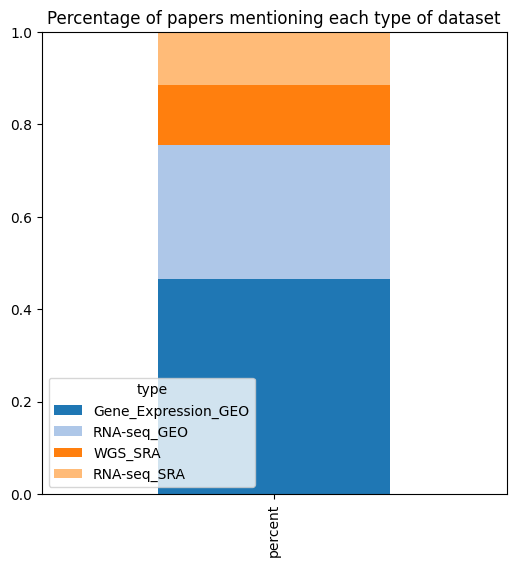

In [ ]:
# visualize distribution of repositories mentioned by papers
ax = repoCounts_T.plot(kind = 'bar', stacked = True, figsize = (6, 6))
plt.ylim(0,1)
title = "Percentage of papers mentioning each type of dataset"
ax.set_title(title)
#plt.savefig("pctMentioningBar.png")

In [ ]:
repoCounts_T

type,Gene_Expression_GEO,RNA-seq_GEO,WGS_SRA,RNA-seq_SRA
percent,0.465626,0.29034,0.130047,0.113988


<Axes: >

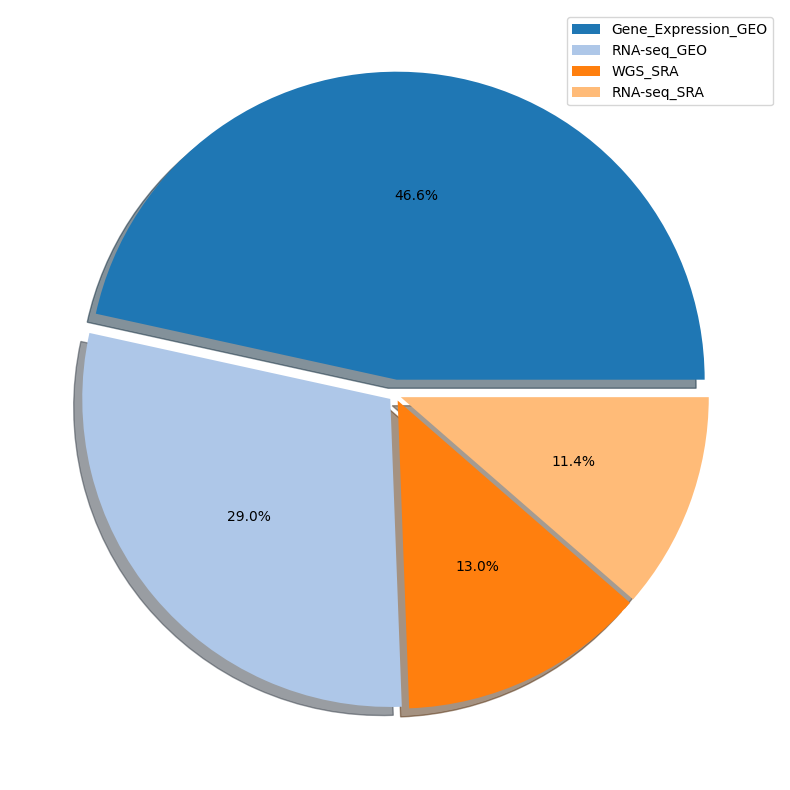

In [ ]:
datafram = pd.DataFrame(repoCounts_T)
datafram.sum().plot(kind = 'pie', y='type', figsize=(10,10), autopct='%1.1f%%', shadow=True, legend=True, labeldistance=None, explode = (0.05, 0.02, 0.02, 0.02))

In [ ]:
rg1 = paps[['reuse_role']]
rg1 = rg1.replace("R", "Secondary")
rg1 = rg1.replace("G", "Primary")

In [ ]:
paps

,pmc_ID,repository,reuse_role,pmc_date,library_strategy,class,type
0,PMC3514680,GEO,G,2012-12-01,Expression_Array,GEO_expr,Gene_Expression_GEO
1,PMC9290052,SRA,G,2021-12-07,WGS,SRA_other,WGS_SRA
2,PMC9984802,SRA,G,2023-02-07,WGS,SRA_other,WGS_SRA
3,PMC8097326,SRA,G,2021-02-15,RNA-Seq,RNA-Seq,RNA-seq_SRA
4,PMC8986393,SRA,G,2022-03-30,RNA-Seq,RNA-Seq,RNA-seq_SRA
...,...,...,...,...,...,...,...
345636,PMC1784107,GEO,R,2007-01-18,Expression_Array,GEO_expr,Gene_Expression_GEO
345637,PMC1618399,GEO,R,2006-10-11,Expression_Array,GEO_expr,Gene_Expression_GEO
345638,PMC1797053,GEO,R,2007-02-05,Expression_Array,GEO_expr,Gene_Expression_GEO
345639,PMC1564424,GEO,R,2006-09-15,Expression_Array,GEO_expr,Gene_Expression_GEO


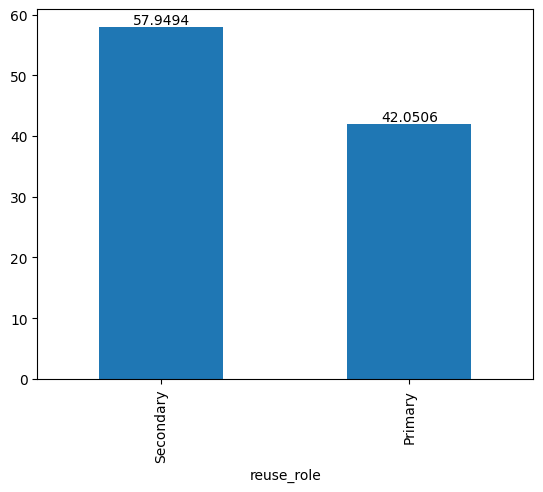

In [ ]:
temp_df = (rg1.groupby('reuse_role').size().sort_values(ascending=False) / rg1.groupby('reuse_role').size().sort_values(ascending=False).sum())*100

ax = temp_df.plot(kind='bar')
#ax = pd.options.display.float_format = '{:.2%}'.format

ax.bar_label(ax.containers[0])
#title = "Percentage of papers mentioning each type of reuse"
#ax.set_title(title)
plt.show()

([<matplotlib.patches.Wedge at 0x7fd3f2f70880>,
 [Text(-0.2842235999171868, 1.1143235370618871, 'Secondary'),
  Text(0.27680917283252754, -1.085254201482663, 'Primary')],
 [Text(-0.16064812169232295, 0.6298350426871535, '57.9%'),
  Text(0.1532336492465777, -0.6007657186779025, '42.1%')])

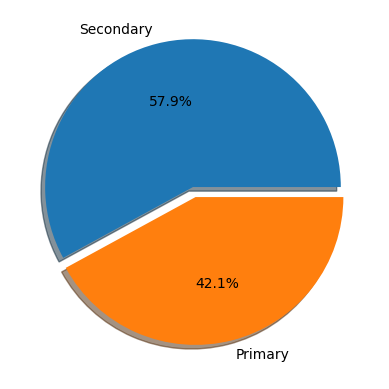

In [ ]:
df = rg1['reuse_role'].value_counts().values.sum()
def fmt(x):
    return '{:.1f}%'.format(x)
plt.pie(rg1['reuse_role'].value_counts().values, labels=rg1['reuse_role'].value_counts().index, autopct=fmt, shadow=True,  explode = (0.05, 0.02))

In [ ]:
# how many papers reuse, generate, or both?
rc = {'type':['generating', 'reusing', 'both']}

for c in ["RNA-seq_GEO", "Gene_Expression_GEO", "RNA-seq_SRA", "WGS_SRA"]:
    rec = Counter(paps.loc[paps['type'] == c, :]['reuse_role'])
    reCo = pd.DataFrame.from_dict(rec, orient = 'index').reset_index()
    reCo.columns = ['reuse_role', 'count']
    reCo['percent'] = reCo['count'] / reCo['count'].sum()
    rc[c] = reCo['percent']

reuseCounts = pd.DataFrame.from_dict(rc, orient = 'index')
reuseCounts.columns = reuseCounts.iloc[0,:]
reuseCounts = reuseCounts.iloc[1:,:]
reuseCounts = reuseCounts.sort_values(by = "reusing", ascending = False)
# reuseCounts

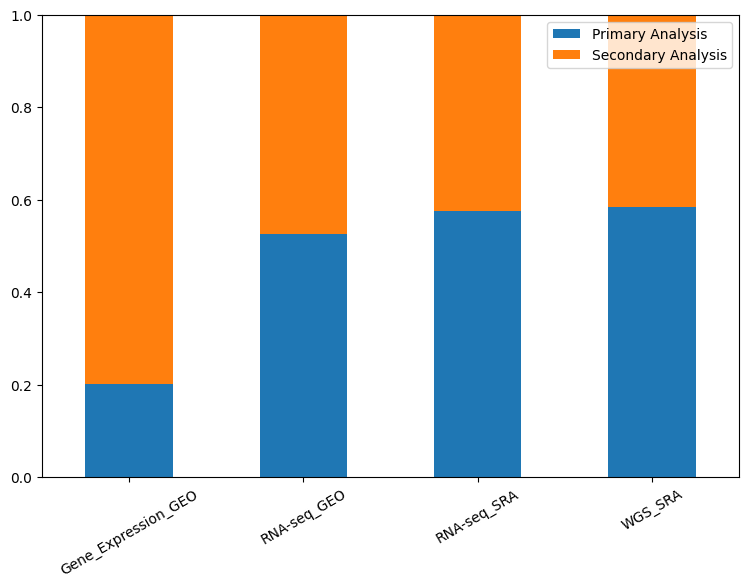

In [ ]:
ax = reuseCounts.plot(kind = 'bar', stacked = True, figsize = fig_dims)
plt.ylim(0,1)
#title = "Reuse role of papers mentioning each repository"
#ax.set_title(title)
ax.legend(["Primary Analysis", "Secondary Analysis", "Both"])
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("reuseRoleRepos.png")

In [ ]:
#paps2 = paps
paps = paps.replace("Gene_Expression_GEO", "MGED")
paps = paps.replace("RNA-seq_GEO", "RSGED")
paps = paps.replace("RNA-seq_SRA", "RSRA")
paps = paps.replace("WGS_SRA", "WGSRA")

In [ ]:
paps

,pmc_ID,repository,reuse_role,pmc_date,library_strategy,class,type
0,PMC3514680,GEO,G,2012-12-01,Expression_Array,GEO_expr,MGED
1,PMC9290052,SRA,G,2021-12-07,WGS,SRA_other,WGSRA
2,PMC9984802,SRA,G,2023-02-07,WGS,SRA_other,WGSRA
3,PMC8097326,SRA,G,2021-02-15,RNA-Seq,RNA-Seq,RSRA
4,PMC8986393,SRA,G,2022-03-30,RNA-Seq,RNA-Seq,RSRA
...,...,...,...,...,...,...,...
345636,PMC1784107,GEO,R,2007-01-18,Expression_Array,GEO_expr,MGED
345637,PMC1618399,GEO,R,2006-10-11,Expression_Array,GEO_expr,MGED
345638,PMC1797053,GEO,R,2007-02-05,Expression_Array,GEO_expr,MGED
345639,PMC1564424,GEO,R,2006-09-15,Expression_Array,GEO_expr,MGED


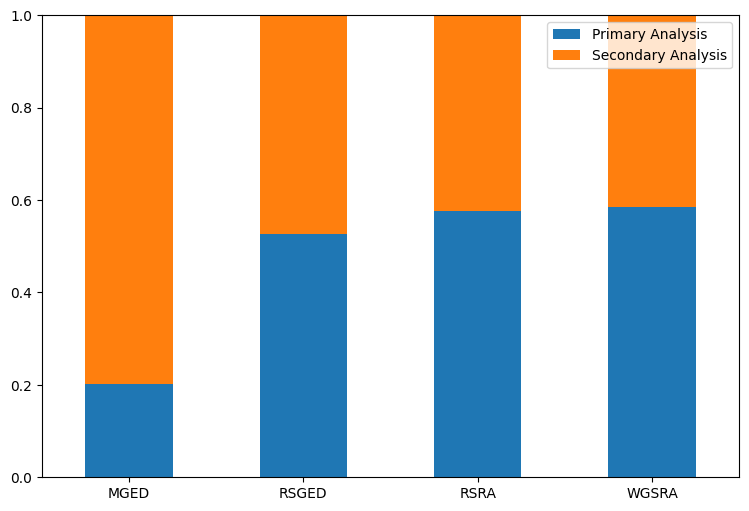

In [ ]:
# how many papers reuse, generate, or both?



rc2 = {'class':['Primary', 'Secondary', 'both']}

for c in ["RSGED", "MGED", "RSRA","WGSRA"]:
    rec2 = Counter(paps.loc[paps['type'] == c, :]['reuse_role'])
    reCo2 = pd.DataFrame.from_dict(rec2, orient = 'index').reset_index()
    reCo2.columns = ['reuse_role', 'count']
    reCo2['percent'] = reCo2['count'] / reCo2['count'].sum()
    rc2[c] = reCo2['percent']

reuseCounts = pd.DataFrame.from_dict(rc2, orient = 'index')
reuseCounts.columns = reuseCounts.iloc[0,:]
reuseCounts = reuseCounts.iloc[1:,:]
reuseCounts = reuseCounts.sort_values(by = "Secondary", ascending = False)
# reuseCounts

ax = reuseCounts.plot(kind = 'bar', stacked = True, figsize = fig_dims)
plt.ylim(0,1)
#title = "Reuse role of papers mentioning each repository"
#ax.set_title(title)
ax.legend(["Primary Analysis", "Secondary Analysis", "Both"])
plt.xticks(rotation=0, horizontalalignment="center")
plt.savefig("reuseRoleRepos.png")

In [ ]:
paps.head()

,pmc_ID,repository,reuse_role,pmc_date,library_strategy,class,type
0,PMC3514680,GEO,G,2012-12-01,Expression_Array,GEO_expr,MGED
1,PMC9290052,SRA,G,2021-12-07,WGS,SRA_other,WGSRA
2,PMC9984802,SRA,G,2023-02-07,WGS,SRA_other,WGSRA
3,PMC8097326,SRA,G,2021-02-15,RNA-Seq,RNA-Seq,RSRA
4,PMC8986393,SRA,G,2022-03-30,RNA-Seq,RNA-Seq,RSRA


In [ ]:
# Convert pmc_date to datetime, coercing errors to NaT
paps['pmc_date'] = pd.to_datetime(paps['pmc_date'], format='%Y-%m-%d', errors='coerce')

# Create a new column for the year, handling NaT values
paps['year'] = paps['pmc_date'].dt.year
paps

,pmc_ID,repository,reuse_role,pmc_date,library_strategy,class,type,year
0,PMC3514680,GEO,G,2012-12-01,Expression_Array,GEO_expr,MGED,2012.0
1,PMC9290052,SRA,G,2021-12-07,WGS,SRA_other,WGSRA,2021.0
2,PMC9984802,SRA,G,2023-02-07,WGS,SRA_other,WGSRA,2023.0
3,PMC8097326,SRA,G,2021-02-15,RNA-Seq,RNA-Seq,RSRA,2021.0
4,PMC8986393,SRA,G,2022-03-30,RNA-Seq,RNA-Seq,RSRA,2022.0
...,...,...,...,...,...,...,...,...
345636,PMC1784107,GEO,R,2007-01-18,Expression_Array,GEO_expr,MGED,2007.0
345637,PMC1618399,GEO,R,2006-10-11,Expression_Array,GEO_expr,MGED,2006.0
345638,PMC1797053,GEO,R,2007-02-05,Expression_Array,GEO_expr,MGED,2007.0
345639,PMC1564424,GEO,R,2006-09-15,Expression_Array,GEO_expr,MGED,2006.0


In [ ]:
# visualize reuse and repository distribution across the years
# add year column
#fmt = '%Y-%m-%d'
#paps.loc[:,'pmc_date'] = pd.to_datetime(paps['pmc_date'], format = fmt, errors='coerce')
#paps['year'] = paps['pmc_date'].dt.year
#paps

In [ ]:
# get repository counts per date
# repo_byDate = paps.groupby(['year', 'repository'])['repository'].count().to_frame(name = 'repo_count').reset_index()
repo_byDate = paps.groupby(['year', 'type'])['type'].count().to_frame(name = 'repo_count').reset_index()
repo_byDate

,year,type,repo_count
0,2000.0,MGED,17
1,2001.0,MGED,22
2,2002.0,MGED,27
3,2003.0,MGED,58
4,2004.0,MGED,216
...,...,...,...
72,2023.0,WGSRA,6020
73,2024.0,MGED,8
74,2024.0,RSGED,8
75,2024.0,RSRA,14


In [ ]:
dropme = repo_byDate[repo_byDate['year'] == 2024].index
repo_byDate.drop(dropme, inplace = True)

years = repo_byDate['year'].drop_duplicates().to_list()
years = [int(i) for i in years]

In [ ]:
repo_byDate

,year,type,repo_count
0,2000.0,MGED,17
1,2001.0,MGED,22
2,2002.0,MGED,27
3,2003.0,MGED,58
4,2004.0,MGED,216
...,...,...,...
68,2022.0,WGSRA,7478
69,2023.0,MGED,26291
70,2023.0,RSGED,23067
71,2023.0,RSRA,7100


In [ ]:
#z = {'year':years, 'repository':'GEO', 'repo_count':0}
#z2 = {'year':years, 'repository':'SRA', 'repo_count':0}
#z3 = {'year':years, 'repository':'Multiple', 'repo_count':0}

z = {'year': years, 'type': ['GEO'] * len(years), 'repo_count': [0] * len(years)}
z2 = {'year': years, 'type': ['SRA'] * len(years), 'repo_count': [0] * len(years)}


zerosGEO = pd.DataFrame(data = z)
zerosSRA = pd.DataFrame(data = z2)
#zerosBoth = pd.DataFrame(data = z3)

# Clean the year column
repo_byDate['year'] = pd.to_numeric(repo_byDate['year'], errors='coerce')
repo_byDate = repo_byDate.dropna(subset=['year'])
repo_byDate['year'] = repo_byDate['year'].astype(int)

repo_byDate['repo_count'] = pd.to_numeric(repo_byDate['repo_count'], errors='coerce')

# Function to process each type
def process_type(repo_byDate, type_name, zerosDF):
    # Filter by type
    filtered_df = repo_byDate[repo_byDate['type'] == type_name]

    # Concatenate with zeros DataFrame
    combined_df = pd.concat([filtered_df, zerosDF])

    # Group by year and sum repo_count
    grouped_df = combined_df.groupby(['year'], sort=False).sum().reset_index()

    # Calculate cumulative sum
    grouped_df['repo_count'] = grouped_df['repo_count'].cumsum()

    return grouped_df


# Process each type
MGED_byDate = process_type(repo_byDate, "MGED", zerosGEO)
RSGED_byDate = process_type(repo_byDate, "RSGED", zerosGEO)
RSRA_byDate = process_type(repo_byDate, "RSRA", zerosSRA)
WGSRA_byDate = process_type(repo_byDate, "WGSRA", zerosSRA)


#MGED_byDate = pd.concat([repo_byDate.loc[repo_byDate['type'] == "MGED", :], zerosGEO]).groupby(['year'], sort = False).sum().reset_index().cumsum()
#RSGED_byDate = pd.concat([repo_byDate.loc[repo_byDate['type'] == "RSGED", :], zerosGEO]).groupby(['year'], sort = False).sum().reset_index().cumsum()
#RSRA_byDate = pd.concat([repo_byDate.loc[repo_byDate['type'] == "RSRA", :], zerosSRA]).groupby(['year'], sort = False).sum().reset_index().cumsum()
#WGSRA_byDate = pd.concat([repo_byDate.loc[repo_byDate['type'] == "WGSRA", :], zerosSRA]).groupby(['year'], sort = False).sum().reset_index().cumsum()

#MGED_byDate = repo_byDate.loc[repo_byDate['type'] == "MGED", :].append(zerosGEO).groupby(['year'], sort = False).sum().reset_index().cumsum()
#RSGED_byDate = repo_byDate.loc[repo_byDate['type'] == "RSGED", :].append(zerosGEO).groupby(['year'], sort = False).sum().reset_index().cumsum()
#RSRA_byDate = repo_byDate.loc[repo_byDate['type'] == "RSRA", :].append(zerosSRA).groupby(['year'], sort = False).sum().reset_index().cumsum()
#WGSRA_byDate = repo_byDate.loc[repo_byDate['type'] == "WGSRA", :].append(zerosSRA).groupby(['year'], sort = False).sum().reset_index().cumsum()


# geo_byDate = repo_byDate.loc[repo_byDate['repository'] == 'GEO', :].append(zerosGEO).groupby(['year']).sum().reset_index().cumsum()
# sra_byDate = repo_byDate.loc[repo_byDate['repository'] == 'SRA', :].append(zerosSRA).groupby(['year']).sum().reset_index().cumsum()
# bothRepo_byDate = repo_byDate.loc[repo_byDate['repository'] == 'Multiple', :].append(zerosBoth).groupby(['year']).sum().reset_index().cumsum()

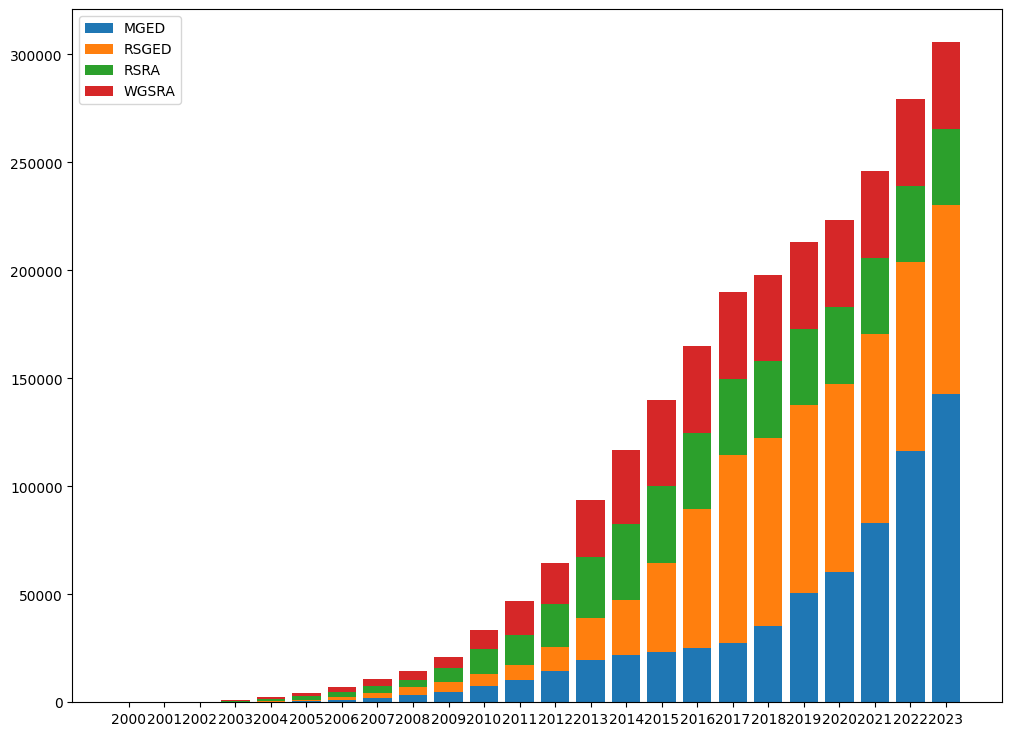

In [ ]:
fig, ax = plt.subplots(figsize = (12, 9))

plt.bar(years, MGED_byDate['repo_count'])
plt.bar(years, RSGED_byDate['repo_count'],
        bottom = MGED_byDate['repo_count'])
plt.bar(years, RSRA_byDate['repo_count'],
        bottom = [i+j for i, j in zip(MGED_byDate['repo_count'], RSGED_byDate['repo_count'])])
plt.bar(years, WGSRA_byDate['repo_count'],
        bottom = [i+j+k for i, j, k in zip(MGED_byDate['repo_count'], RSGED_byDate['repo_count'], RSRA_byDate['repo_count'])])

plt.xticks(ticks = years)
#title = "Yearly breakdown of papers mentioning each repository (cumulative)"
#plt.title(title)
plt.legend(["MGED", "RSGED", "RSRA", "WGSRA"], loc = 'upper left')
#plt.savefig("repoTimeSer.png")
plt.show()

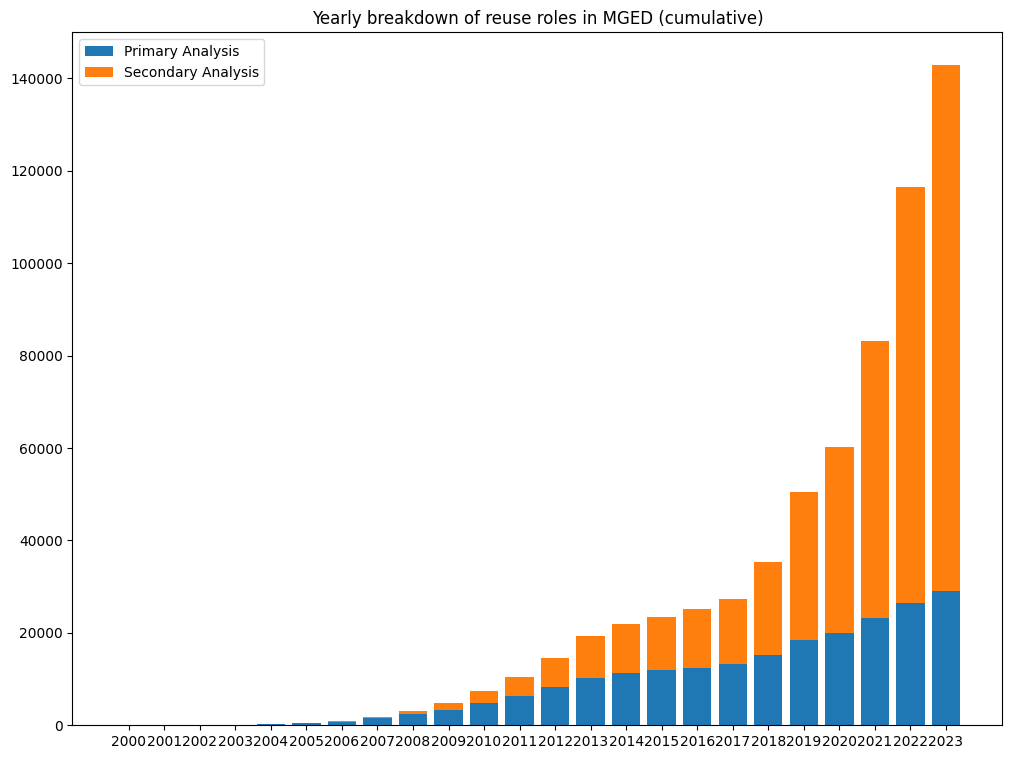

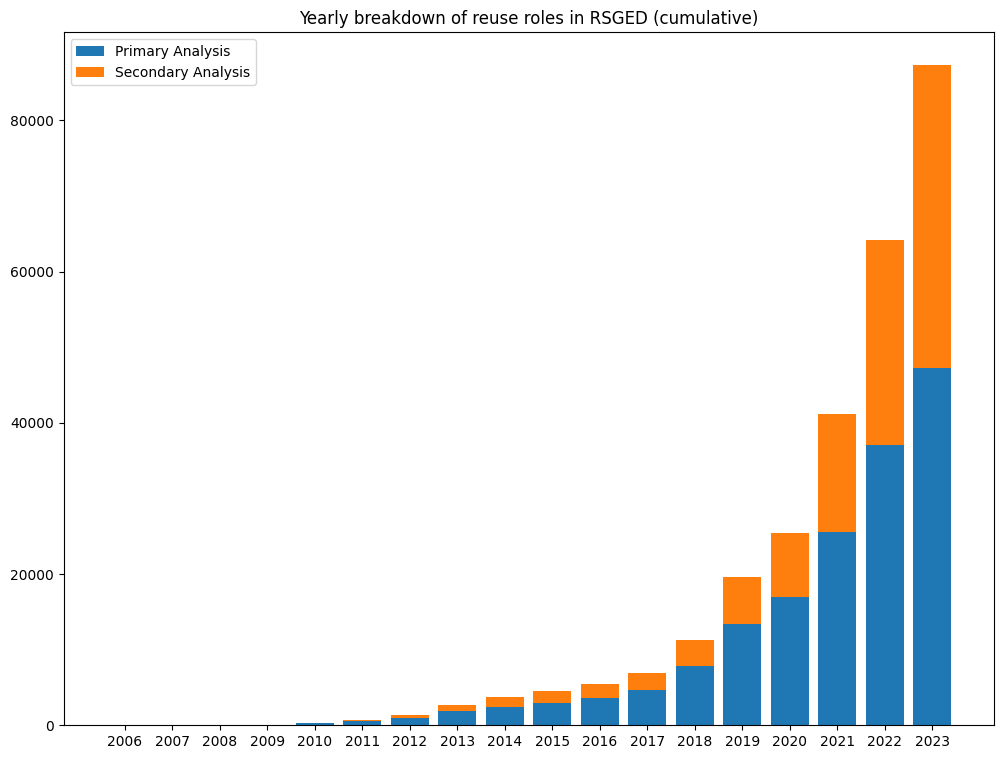

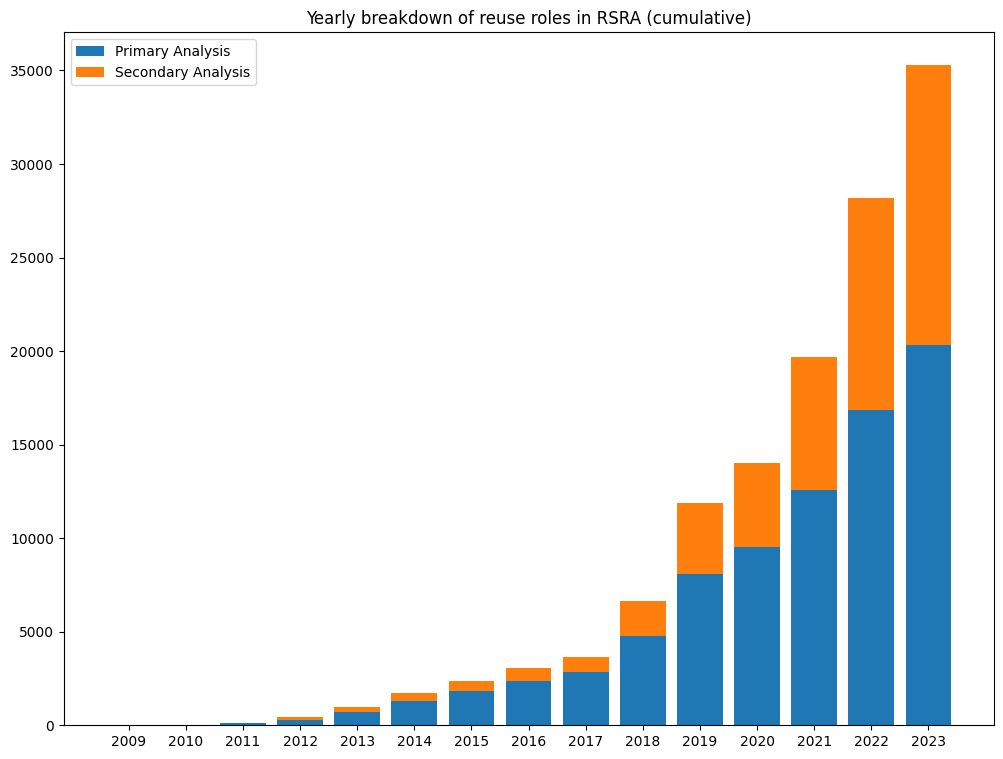

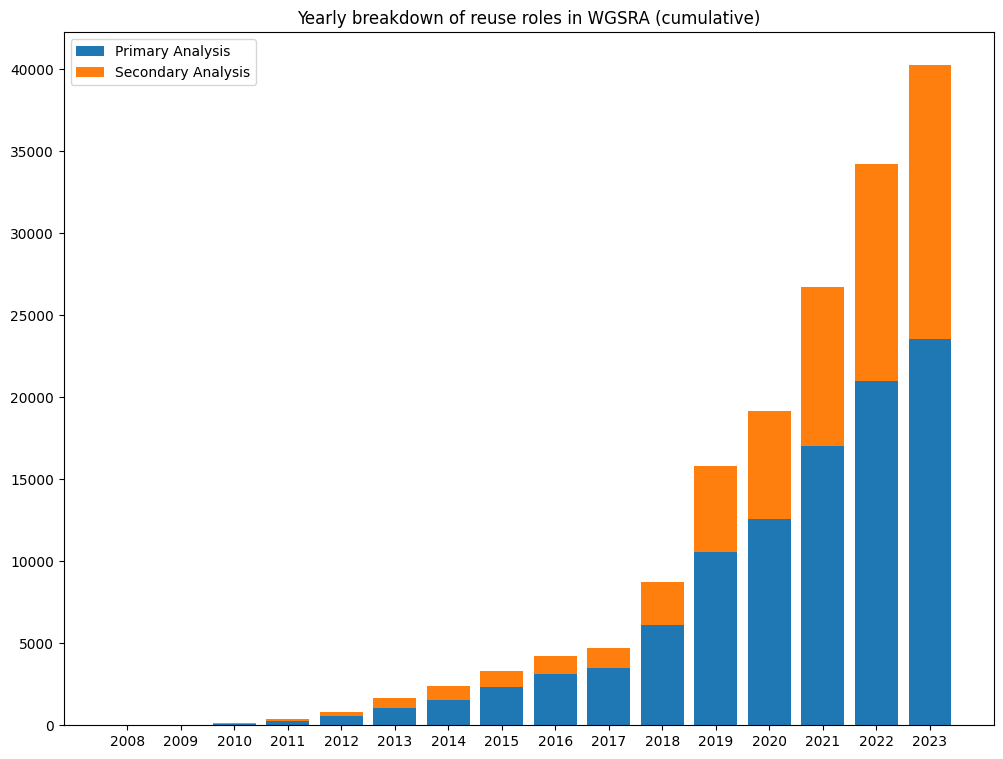

In [ ]:
# get reuse counts per date

# CUMULATIVE
reuse_byMGED = paps.loc[paps['type'] == 'MGED', :].groupby(['year', 'reuse_role'])['reuse_role'].count().to_frame(name = 'reuse_count').reset_index()
reuse_byRSGED = paps.loc[paps['type'] == 'RSGED', :].groupby(['year', 'reuse_role'])['reuse_role'].count().to_frame(name = 'reuse_count').reset_index()
reuse_byRSRA = paps.loc[paps['type'] == 'RSRA', :].groupby(['year', 'reuse_role'])['reuse_role'].count().to_frame(name = 'reuse_count').reset_index()
reuse_byWGSRA = paps.loc[paps['type'] == 'WGSRA', :].groupby(['year', 'reuse_role'])['reuse_role'].count().to_frame(name = 'reuse_count').reset_index()

#reuse_byDateSRAother = paps.loc[paps['class'] == 'SRA_other', :].groupby(['year', 'reuse_role'])['reuse_role'].count().to_frame(name = 'reuse_count').reset_index()

timesthru = 0

for reuse_byDate in [reuse_byMGED, reuse_byRSGED, reuse_byRSRA, reuse_byWGSRA]:

    dropme = reuse_byDate[reuse_byDate['year'] == 2024].index
    reuse_byDate.drop(dropme, inplace = True)

    years = reuse_byDate['year'].drop_duplicates().to_list()

    z = {'year':years, 'reuse_role':'G', 'repo_count':0}
    z2 = {'year':years, 'reuse_role':'R', 'repo_count':0}

    #z3 = {'year':years, 'type':'RSRA', 'reuse_count':0}
    #z4 = {'year':years, 'type':'WGSRA', 'reuse_count':0}

    zerosG = pd.DataFrame(data = z)
    zerosR = pd.DataFrame(data = z2)
    #zerosRS = pd.DataFrame(data = z3)
    #zerosWS = pd.DataFrame(data = z4)

    R_byDate = pd.concat([reuse_byDate.loc[reuse_byDate['reuse_role'] == 'R', :], (zerosR)]).groupby(['year']).sum().reset_index().cumsum()
    G_byDate = pd.concat([reuse_byDate.loc[reuse_byDate['reuse_role'] == 'G', :], (zerosG)]).groupby(['year']).sum().reset_index().cumsum()

    fig, ax = plt.subplots(figsize = (12, 9))

    plt.bar(years, G_byDate['reuse_count'])
    plt.bar(years, R_byDate['reuse_count'],
            bottom = G_byDate['reuse_count'])


    if timesthru == 0:
        cls = "MGED"
    elif timesthru == 1:
        cls = "RSGED"
    elif timesthru == 2:
        cls = "RSRA"
    elif timesthru == 3:
        cls = "WGSRA"
    timesthru = timesthru + 1

    plt.xticks(ticks = years)
    title = "Yearly breakdown of reuse roles in " + str(cls) + " (cumulative)"
    plt.title(title)
    plt.legend(["Primary Analysis", "Secondary Analysis"], loc = 'upper left')
    #filename = "cumTimeSer_" + cls + ".png"
    #plt.savefig(filename)
    plt.show()

In [ ]:
paps.head()

,pmc_ID,repository,reuse_role,pmc_date,library_strategy,class,type,year
0,PMC3514680,GEO,G,2012-12-01,Expression_Array,GEO_expr,MGED,2012.0
1,PMC9290052,SRA,G,2021-12-07,WGS,SRA_other,WGSRA,2021.0
2,PMC9984802,SRA,G,2023-02-07,WGS,SRA_other,WGSRA,2023.0
3,PMC8097326,SRA,G,2021-02-15,RNA-Seq,RNA-Seq,RSRA,2021.0
4,PMC8986393,SRA,G,2022-03-30,RNA-Seq,RNA-Seq,RSRA,2022.0


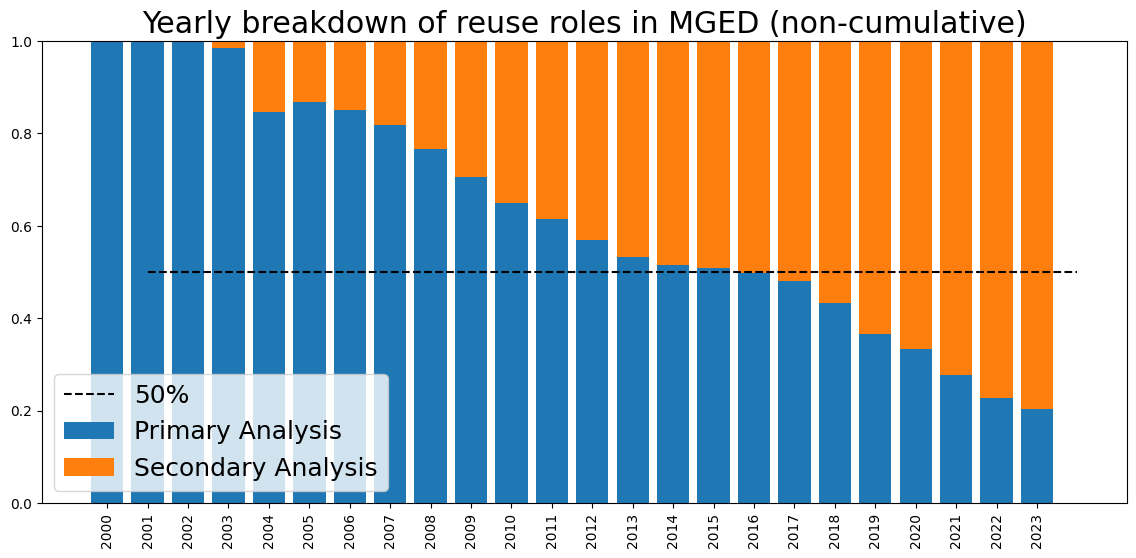

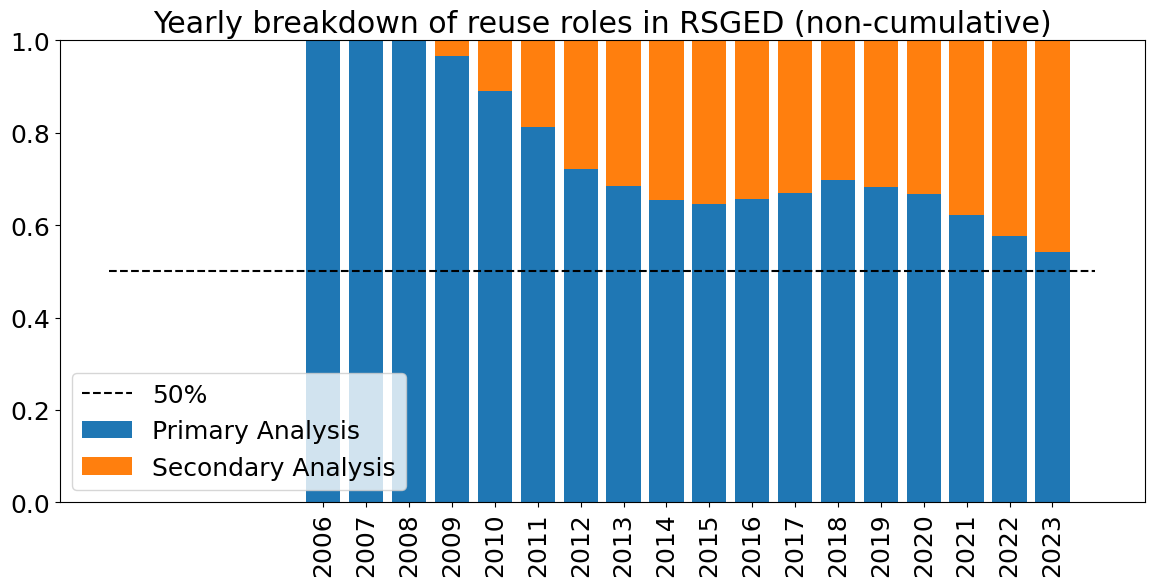

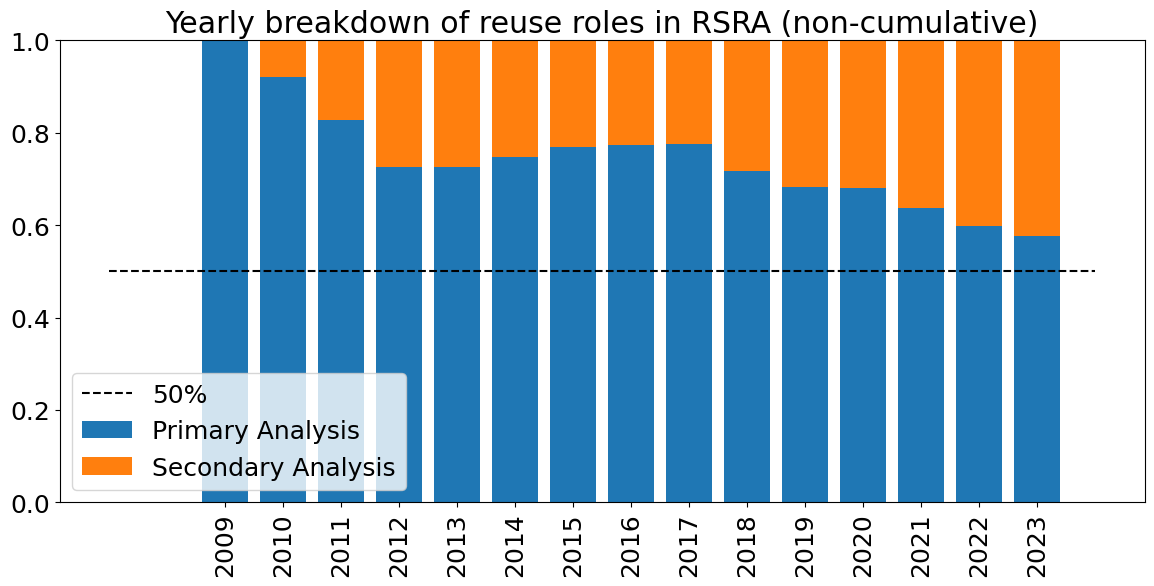

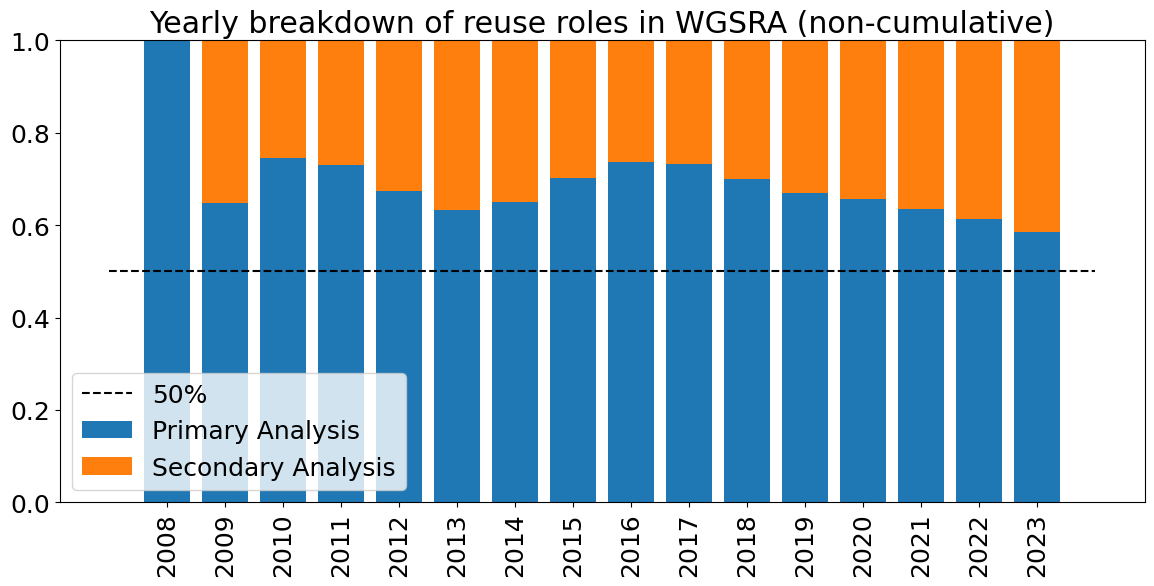

In [ ]:
# CUMULATIVE
reuse_byMGED = paps.loc[paps['type'] == 'MGED', :].groupby(['year', 'reuse_role'])['reuse_role'].count().to_frame(name = 'reuse_count').reset_index()
reuse_byRSGED = paps.loc[paps['type'] == 'RSGED', :].groupby(['year', 'reuse_role'])['reuse_role'].count().to_frame(name = 'reuse_count').reset_index()
reuse_byRSRA = paps.loc[paps['type'] == 'RSRA', :].groupby(['year', 'reuse_role'])['reuse_role'].count().to_frame(name = 'reuse_count').reset_index()
reuse_byWGSRA = paps.loc[paps['type'] == 'WGSRA', :].groupby(['year', 'reuse_role'])['reuse_role'].count().to_frame(name = 'reuse_count').reset_index()

# NON-CUMULATIVE
timesthru = 0
for reuse_byDate in [reuse_byMGED, reuse_byRSGED, reuse_byRSRA, reuse_byWGSRA]:

    dropme = reuse_byDate[reuse_byDate['year'] == 2024].index
    reuse_byDate.drop(dropme, inplace = True)

    years = reuse_byDate['year'].drop_duplicates().to_list()

    z = {'year':years, 'reuse_role':'G', 'reuse_count':0}
    z2 = {'year':years, 'reuse_role':'R', 'reuse_count':0}

    zerosG = pd.DataFrame(data = z)
    zerosR = pd.DataFrame(data = z2)

    R_byDate = pd.concat([reuse_byDate.loc[reuse_byDate['reuse_role'] == 'R', :], (zerosR)]).groupby(['year']).sum().reset_index().cumsum()
    G_byDate = pd.concat([reuse_byDate.loc[reuse_byDate['reuse_role'] == 'G', :], (zerosG)]).groupby(['year']).sum().reset_index().cumsum()

    fig, ax = plt.subplots(figsize = (14, 6))

    total_counts = G_byDate['reuse_count'] + R_byDate['reuse_count'] # + bothReuse_byDate['reuse_count']
    plt.bar(years, G_byDate['reuse_count'] / total_counts)
    plt.bar(years, R_byDate['reuse_count'] / total_counts,
            bottom = G_byDate['reuse_count'] / total_counts)

    if timesthru == 0:
        cls = "MGED"
        plt.plot([2001, 2024], [0.5, 0.5], '--', color = 'black')
    elif timesthru == 1:
        cls = "RSGED"
        plt.plot([2001, 2024], [0.5, 0.5], '--', color = 'black')
    elif timesthru == 2:
        cls = "RSRA"
        plt.plot([2007, 2024], [0.5, 0.5], '--', color = 'black')
    elif timesthru == 3:
        cls = "WGSRA"
        plt.plot([2007, 2024], [0.5, 0.5], '--', color = 'black')
    timesthru = timesthru + 1

    plt.rc('font', size = 18)
    plt.xticks(ticks = years)
    title = "Yearly breakdown of reuse roles in " + str(cls) + " (non-cumulative)"
    plt.title(title)
    plt.legend(["50%", "Primary Analysis", "Secondary Analysis"], loc = 'lower left')
    plt.xticks(rotation = 90)

    #filename = "../figures/nonCumTimeSer_" + cls + ".png"
    #plt.savefig(filename)
    plt.show()

plt.rc('font', size = 12)

In [ ]:
# remove papers with 'Multiple' listed for either repository or reuse_role
paps = paps.loc[paps['repository'] != 'Multiple', :].loc[paps['reuse_role'] != 'Multiple', :]
# paps

### Visualize by dataset

Consider the data in units of SRA and GEO datasets.

In [ ]:
nn.head()

,pmc_ID,accession,converted_accession,repository,pmc_date,repository_date,species,hardware,library_strategy,sraAvg_length,...,library_type,Series_Type,today,time_public,reuse_count,norm_reuse_count,reuse_role,reuse_role_x,pub_delay,class
0,PMC3514680,GSE36260,GSE36260,GEO,2012-12-01,2012-03-06,Drosophila melanogaster,in situ oligonucleotide,Expression_Array,NaN,...,genomic,NaN,2024-06-02,12.249315,0,0.0,G,G,270.0,GEO_expr
1,PMC9290052,PRJNA712975,SRP310371,SRA,2021-12-07,2021-03-12,Wolbachia pipientis,Sequel II,WGS,4886.0,...,GENOMIC,NaN,2024-06-02,3.227397,0,0.0,G,G,270.0,SRA_other
2,PMC9984802,ERX9258761,ERP136494,SRA,2023-02-07,2022-05-13,Auanema sp. JU1783,Illumina HiSeq 2000,WGS,202.0,...,GENOMIC,NaN,2024-06-02,2.057534,0,0.0,G,G,270.0,SRA_other
3,PMC8097326,SRP262554,SRP262554,SRA,2021-02-15,2020-05-21,Cucumis sativus,PacBio RS II,RNA-Seq,1962.0,...,TRANSCRIPTOMIC,NaN,2024-06-02,4.035616,0,0.0,G,G,270.0,RNA-Seq
4,PMC8986393,PRJNA743336,SRP326696,SRA,2022-03-30,2021-07-03,Rattus norvegicus,Illumina NovaSeq 6000,RNA-Seq,300.0,...,TRANSCRIPTOMIC,NaN,2024-06-02,2.917808,0,0.0,G,G,270.0,RNA-Seq


In [ ]:
# how many times is each dataset used?
# take the slice we need from mm
accs = nn[['pmc_ID','converted_accession', 'repository', 'reuse_count', 'norm_reuse_count', 'time_public', 'class', 'pmc_date']].drop_duplicates()
# accs['reuse_count'] = accs['total_use_count'] - 1
# accs

In [ ]:
accs.loc[(paps['repository'] == 'GEO') & (paps['class'] == 'GEO_expr'), 'type'] = "MGED"
accs.loc[(paps['repository'] == 'GEO') & (paps['class'] == 'RNA-Seq'), 'type'] = "RSGED"
accs.loc[(paps['repository'] == 'SRA') & (paps['class'] == 'RNA-Seq'), 'type'] = "RSRA"
#paps.loc[(paps['repository'] == 'SRA') & (paps['class'] != 'RNA-Seq'), 'type'] = "Other_SRA"
accs.loc[(paps['repository'] == 'SRA') & (paps['library_strategy'] == 'WGS'), 'type'] = "WGSRA"
accs

,pmc_ID,converted_accession,repository,reuse_count,norm_reuse_count,time_public,class,pmc_date,type
0,PMC3514680,GSE36260,GEO,0,0.000000,12.249315,GEO_expr,2012-12-01,MGED
1,PMC9290052,SRP310371,SRA,0,0.000000,3.227397,SRA_other,2021-12-07,WGSRA
2,PMC9984802,ERP136494,SRA,0,0.000000,2.057534,SRA_other,2023-02-07,WGSRA
3,PMC8097326,SRP262554,SRA,0,0.000000,4.035616,RNA-Seq,2021-02-15,RSRA
4,PMC8986393,SRP326696,SRA,0,0.000000,2.917808,RNA-Seq,2022-03-30,RSRA
...,...,...,...,...,...,...,...,...,...
345636,PMC1784107,GSE1159,GEO,35,1.737386,20.145205,GEO_expr,2007-01-18,MGED
345637,PMC1618399,GSE1432,GEO,8,0.411326,19.449315,GEO_expr,2006-10-11,MGED
345638,PMC1797053,GSE3744,GEO,65,3.547398,18.323288,GEO_expr,2007-02-05,MGED
345639,PMC1564424,GSE5405,GEO,1,0.056327,17.753425,GEO_expr,2006-09-15,MGED


In [ ]:
# what percentage of datasets are used more than once (re-used at least once)?
accs['wasReused'] = accs['reuse_count'] * accs['time_public'] >= 1
accsPcts = accs.groupby('type', as_index = False).agg({'wasReused':'mean'})
accsPcts = accsPcts.rename(columns = {'wasReused':'pctReused'})
# accsPcts

In [ ]:
accsPcts.pctReused = accsPcts.pctReused*100
accsPcts.head()

,type,pctReused
0,MGED,85.794665
1,RSGED,55.196449
2,RSRA,45.968298
3,WGSRA,48.139998


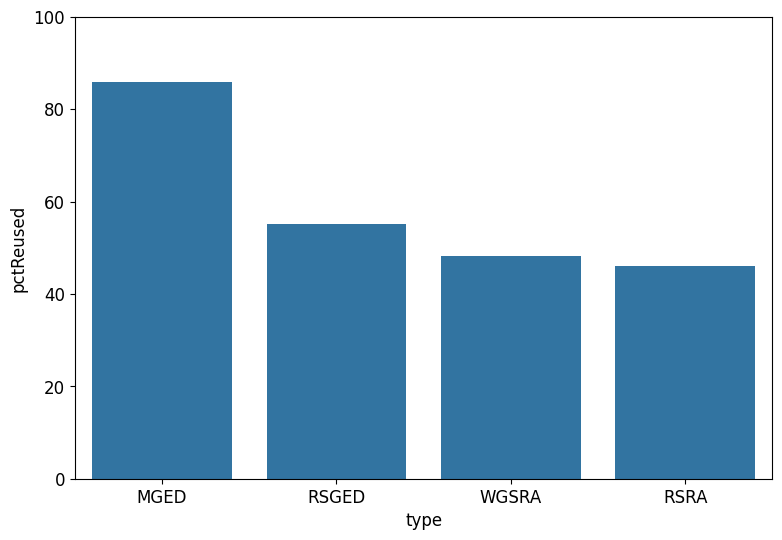

In [ ]:
# plot barplot showing percentage of datasets reused in GEO and SRA
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data = accsPcts, x = 'type', y = 'pctReused', ax = ax, order=["MGED", "RSGED", "WGSRA", "RSRA"])
plt.ylim(0,100)
#title = "Percentage of datasets reused"
#ax.set_title(title)
#plt.savefig("pctDataReused.png")
plt.show()

In [ ]:
accs.head()

,pmc_ID,converted_accession,repository,reuse_count,norm_reuse_count,time_public,class,pmc_date,type,wasReused
0,PMC3514680,GSE36260,GEO,0,0.0,12.249315,GEO_expr,2012-12-01,MGED,False
1,PMC9290052,SRP310371,SRA,0,0.0,3.227397,SRA_other,2021-12-07,WGSRA,False
2,PMC9984802,ERP136494,SRA,0,0.0,2.057534,SRA_other,2023-02-07,WGSRA,False
3,PMC8097326,SRP262554,SRA,0,0.0,4.035616,RNA-Seq,2021-02-15,RSRA,False
4,PMC8986393,SRP326696,SRA,0,0.0,2.917808,RNA-Seq,2022-03-30,RSRA,False


In [ ]:
# plot distribution of reuse for each unique dataset, first using a boxplot
# each point is a dataset

# remove datasets not reused at all
#fmt = '%Y-%m-%d'
#accs.loc[:,'pmc_date'] = pd.to_datetime(paps['pmc_date'], format = fmt, errors='coerce')
accs['pmc_date'] = pd.to_datetime(paps['pmc_date'], format='%Y-%m-%d', errors='coerce')
accs['year'] = accs['pmc_date'].dt.year
accs_filt = accs[accs['year'] < 2008].index
accs.drop(accs_filt, inplace = True)
# accs_filt

In [ ]:
accs.dtypes

pmc_ID                         object
converted_accession            object
repository                     object
reuse_count                     int64
norm_reuse_count              float64
time_public                   float64
class                          object
pmc_date               datetime64[ns]
type                           object
wasReused                        bool
year                          float64
dtype: object

In [ ]:
# Date publication after 2008
import numpy as np
accs['year'] = accs['year'].fillna(0)
accs['year'] = accs['year'].astype(np.int64)
accs_filt = accs.loc[accs['reuse_count'] > 0, :]

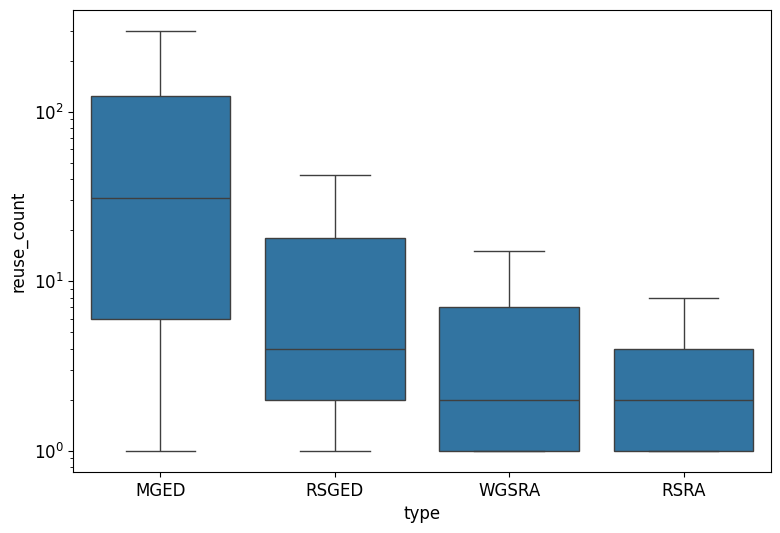

In [ ]:
fig, ax = plt.subplots(figsize=fig_dims)
datasets_box = sns.boxplot(data = accs_filt, x = 'type', y = 'reuse_count', showfliers = False, ax = ax,
                           order = ["MGED", "RSGED", "WGSRA", "RSRA"])
#datasets_box = sns.boxenplot(data = accs_filt, x = 'class', y = 'reuse_count', ax = ax,
#                            order = ["GEO_expr", "RNA-Seq", "SRA_other"], showfliers = False)
datasets_box.set(yscale = 'log')
#title = "Distribution of reused datasets (After 2008)"
#ax.set_title(title)
#plt.savefig("reuseDistRepos.png")
plt.show()

In [ ]:
MGEDMean = statistics.mean(accs_filt.loc[accs_filt['type'] == "MGED"]['reuse_count'])
RSGEDMean = statistics.mean(accs_filt.loc[accs_filt['type'] == "RSGED"]['reuse_count'])
WGSRAMean = statistics.mean(accs_filt.loc[accs_filt['type'] == "WGSRA"]['reuse_count'])
RSRAMean = statistics.mean(accs_filt.loc[accs_filt['type'] == "RSRA"]['reuse_count'])
print("MGED mean reuse count is " + str(MGEDMean))
print("RSGED mean reuse count is " + str(RSGEDMean))
print("WGSRA mean reuse count is " + str(WGSRAMean))
print("RSRA mean reuse count is " + str(RSRAMean))

MGEDMean = statistics.median(accs_filt.loc[accs_filt['type'] == "MGED"]['reuse_count'])
RSGEDMean = statistics.median(accs_filt.loc[accs_filt['type'] == "RSGED"]['reuse_count'])
WGSRAMean = statistics.median(accs_filt.loc[accs_filt['type'] == "WGSRA"]['reuse_count'])
RSRAMean = statistics.median(accs_filt.loc[accs_filt['type'] == "RSRA"]['reuse_count'])
print("MGED median reuse count is " + str(MGEDMean))
print("RSGED median reuse count is " + str(RSGEDMean))
print("WGSRA median reuse count is " + str(WGSRAMean))
print("RSRA median reuse count is " + str(RSRAMean))


MGED mean reuse count is 189.66234579921937
RSGED mean reuse count is 26.10994121094119
WGSRA mean reuse count is 8.249486652977414
RSRA mean reuse count is 6.969069462647444
MGED median reuse count is 31
RSGED median reuse count is 4
WGSRA median reuse count is 2.0
RSRA median reuse count is 2


In [ ]:
# scipy.stats.ttest_ind(a = accs_filt.loc[accs_filt['repository'] == 'GEO', :]['reuse_count'],
#                      b = accs_filt.loc[accs_filt['repository'] == 'SRA', :]['reuse_count'],
#                      equal_var = False)

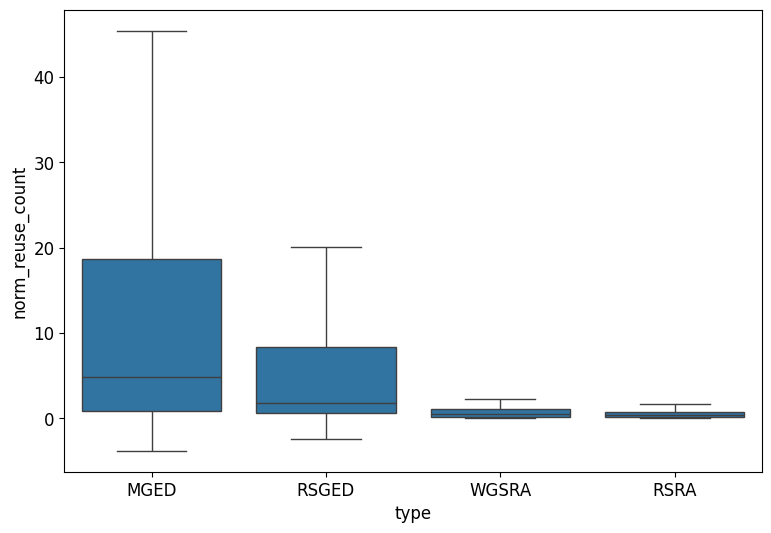

In [ ]:
# plot the distribution of reuse for each dataset, normalized by time public
fig, ax = plt.subplots(figsize=fig_dims)
datasets_box = sns.boxplot(data = accs_filt, x = 'type', y = 'norm_reuse_count', showfliers = False, ax = ax,
                          order = ["MGED", "RSGED", "WGSRA", "RSRA"])
# datasets_box = sns.boxenplot(data = accs_filt, x = 'class', y = 'norm_reuse_count', ax = ax,
#                             order = ["GEO_expr", "RNA-Seq", "SRA_other"])
# datasets_box.set(yscale = 'log')
#title = "Distribution of reused datasets, normalized by time public"
#ax.set_title(title)
#plt.savefig("reuseDistRepos_norm.png")
plt.show()

### Visualize by feature

Consider the data in units of each dataset's reuse count.

In [ ]:
mm_filt = pd.merge(paps,nn , how = 'left', on = ['pmc_ID', 'repository', 'reuse_role', 'class'])
mm_filt

,pmc_ID,repository,reuse_role,pmc_date_x,library_strategy_x,class,type,year,accession,converted_accession,...,sraAvg_length,sraBases,library_type,Series_Type,today,time_public,reuse_count,norm_reuse_count,reuse_role_x,pub_delay
0,PMC3514680,GEO,G,2012-12-01,Expression_Array,GEO_expr,MGED,2012.0,GSE36260,GSE36260,...,NaN,NaN,genomic,NaN,2024-06-02,12.249315,0.0,0.0,G,270.0
1,PMC3514680,GEO,G,2012-12-01,Expression_Array,GEO_expr,MGED,2012.0,GSE36262,GSE36262,...,NaN,NaN,genomic,NaN,2024-06-02,12.249315,0.0,0.0,G,270.0
2,PMC3514680,GEO,G,2012-12-01,Expression_Array,GEO_expr,MGED,2012.0,GSE36264,GSE36264,...,NaN,NaN,genomic,NaN,2024-06-02,12.249315,0.0,0.0,G,270.0
3,PMC3514680,GEO,G,2012-12-01,Expression_Array,GEO_expr,MGED,2012.0,GSE36261,GSE36261,...,NaN,NaN,genomic,NaN,2024-06-02,12.249315,0.0,0.0,G,270.0
4,PMC3514680,GEO,G,2012-12-01,Expression_Array,GEO_expr,MGED,2012.0,GSE36265,GSE36265,...,NaN,NaN,RNA,NaN,2024-06-02,12.249315,0.0,0.0,G,270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475900,PMC1784107,GEO,R,2007-01-18,Expression_Array,GEO_expr,MGED,2007.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1475901,PMC1618399,GEO,R,2006-10-11,Expression_Array,GEO_expr,MGED,2006.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1475902,PMC1797053,GEO,R,2007-02-05,Expression_Array,GEO_expr,MGED,2007.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1475903,PMC1564424,GEO,R,2006-09-15,Expression_Array,GEO_expr,MGED,2006.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
accs_feat = mm_filt.drop(labels = ['pmc_ID', 'accession', 'pmc_date_x'], axis = 1).drop_duplicates()
accs_feat = accs_feat.rename(columns = {'pmc_date_y' : 'pmc_date'})
# accs_feat['reuse_count'] = (accs_feat['total_use_count'] - 1)
# accs_feat

In [ ]:
def inList(pot_vec, ref_vec):
    bools = []
    for i in pot_vec:
        if(type(i) == str):
            if(i in ref_vec):
                bools.append(True)
            else:
                bools.append(False)
        else:
            bools.append(False)
    return bools

In [ ]:
accs_feat.head()

,repository,reuse_role,library_strategy_x,class,type,year,converted_accession,pmc_date,repository_date,species,...,sraAvg_length,sraBases,library_type,Series_Type,today,time_public,reuse_count,norm_reuse_count,reuse_role_x,pub_delay
0,GEO,G,Expression_Array,GEO_expr,MGED,2012.0,GSE36260,2012-12-01,2012-03-06,Drosophila melanogaster,...,NaN,NaN,genomic,NaN,2024-06-02,12.249315,0.0,0.0,G,270.0
1,GEO,G,Expression_Array,GEO_expr,MGED,2012.0,GSE36262,2012-12-01,2012-03-06,Drosophila melanogaster,...,NaN,NaN,genomic,NaN,2024-06-02,12.249315,0.0,0.0,G,270.0
2,GEO,G,Expression_Array,GEO_expr,MGED,2012.0,GSE36264,2012-12-01,2012-03-06,Drosophila melanogaster,...,NaN,NaN,genomic,NaN,2024-06-02,12.249315,0.0,0.0,G,270.0
3,GEO,G,Expression_Array,GEO_expr,MGED,2012.0,GSE36261,2012-12-01,2012-03-06,Drosophila melanogaster,...,NaN,NaN,genomic,NaN,2024-06-02,12.249315,0.0,0.0,G,270.0
4,GEO,G,Expression_Array,GEO_expr,MGED,2012.0,GSE36265,2012-12-01,2012-03-06,Drosophila melanogaster,...,NaN,NaN,RNA,NaN,2024-06-02,12.249315,0.0,0.0,G,270.0


In [ ]:
accs_feat.loc[(accs_feat['repository'] == 'GEO') & (accs_feat['class'] == 'GEO_expr'), 'type'] = "MGED"
accs_feat.loc[(accs_feat['repository'] == 'GEO') & (accs_feat['class'] == 'RNA-Seq'), 'type'] = "RSGED"
accs_feat.loc[(accs_feat['repository'] == 'SRA') & (accs_feat['class'] == 'RNA-Seq'), 'type'] = "RSRA"
accs_feat.loc[(accs_feat['repository'] == 'SRA') & (accs_feat['library_strategy_x'] == 'WGS'), 'type'] = "WGSRA"

In [ ]:
# plot reuse per species

sc = Counter(accs_feat['species'])

specCounts = pd.DataFrame.from_dict(sc, orient = 'index').reset_index()
specCounts.columns = ['species', 'count']

accs_feat['is_human'] = accs_feat['species'] == 'Homo sapiens'
# specCounts

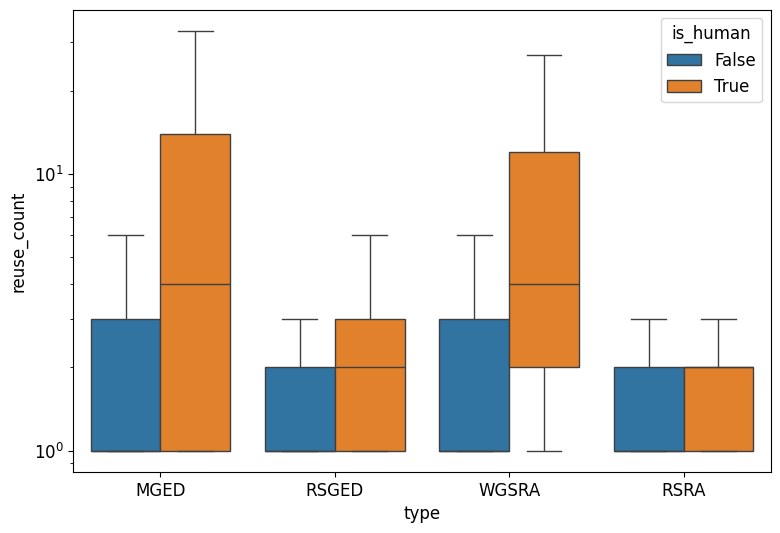

In [ ]:
fig, ax = plt.subplots(figsize=fig_dims)
# sns.boxenplot(data = accs_feat.loc[accs_feat['reuse_count'] > 0, :],
#               x = 'class', y = 'reuse_count', hue = 'is_human', ax = ax).set(yscale = 'log')
sns.boxplot(data = accs_feat.loc[accs_feat['reuse_count'] > 0, :],
            x = 'type', y = 'reuse_count', hue = 'is_human', showfliers = False, ax = ax,
            order = ["MGED", "RSGED", "WGSRA", "RSRA"]).set(yscale = 'log')
#title = "Distribution of reused datasets, human or nonhuman"
#ax.set_title(title)
#plt.savefig("reuseDistHuman.png")
plt.show()

In [ ]:
accs_feat_filt = accs_feat.loc[accs_feat['reuse_count'] > 0, :]
accs_feat_filtGEO = accs_feat_filt.loc[accs_feat_filt['repository'] == 'GEO', :]
accs_feat_filtSRA = accs_feat_filt.loc[accs_feat_filt['repository'] == 'SRA', :]

scipy.stats.ttest_ind(a = accs_feat_filtGEO.loc[accs_feat_filtGEO['is_human'] == True, :]['reuse_count'],
                     b = accs_feat_filtGEO.loc[accs_feat_filtGEO['is_human'] == False, :]['reuse_count'],
                     equal_var = False)
scipy.stats.ttest_ind(a = accs_feat_filtSRA.loc[accs_feat_filtSRA['is_human'] == True, :]['reuse_count'],
                     b = accs_feat_filtSRA.loc[accs_feat_filtSRA['is_human'] == False, :]['reuse_count'],
                     equal_var = False)

TtestResult(statistic=8.86341990260625, pvalue=2.0022365641517372e-18, df=1617.0680887492476)

In [ ]:
# plot RI distribution for species with most amount of datasets which are present in all 3 categories
# get the columns we want and group on species
specCounts = accs_feat[['converted_accession', 'species', 'type']].drop_duplicates()
specCounts = specCounts.groupby(['species'], as_index = False).agg({'converted_accession':'nunique',
                                                   'type':'nunique'})
specCounts.columns = ['species', 'acc_count', 'type_count']
# filter out species with datasets in less than all 3 categories
specCounts = specCounts.loc[specCounts['type_count'] > 2, :]
specCounts = specCounts.dropna().sort_values(by = 'acc_count', ascending = False)
specCounts

,species,acc_count,type_count
5727,Homo sapiens,39022,4
7514,Mus musculus,24223,4
954,Arabidopsis thaliana,1850,4
9912,Rattus norvegicus,1813,4
4091,Drosophila melanogaster,1606,4
...,...,...,...
6774,Loxodonta africana,3,3
11311,Streptococcus sanguinis,3,3
9855,Quercus robur,3,3
6454,Leishmania amazonensis,3,3


<ipython-input-54-9ff6a27ec35e>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_xticklabels(s.get_xticklabels(), rotation = 90)


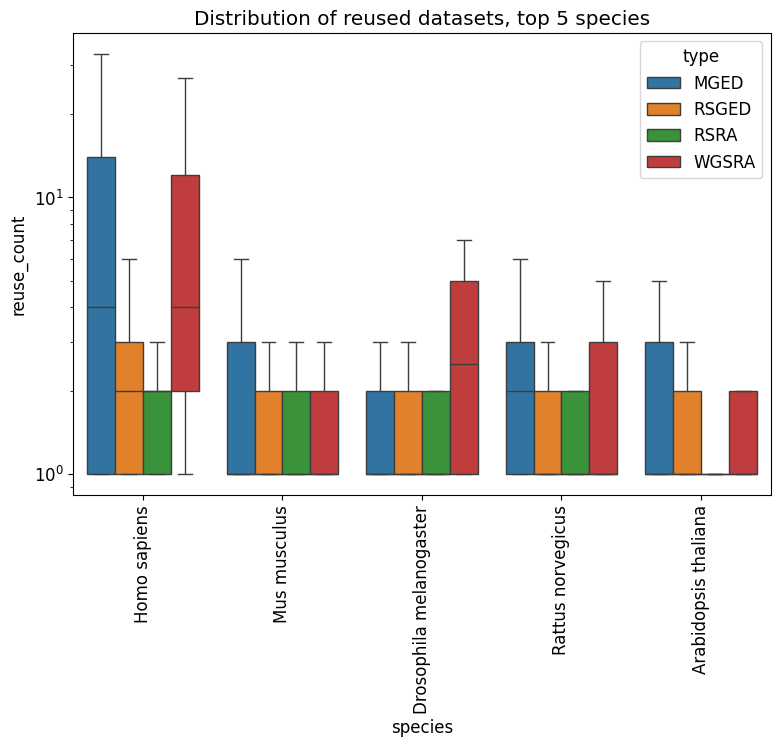

In [ ]:
NUM_TOPSPECIES = 5

topSpec = specCounts.head(n = NUM_TOPSPECIES)['species'].to_list()

accs_top_spec = accs_feat.loc[inList(accs_feat['species'], topSpec), :].sort_values(by = 'reuse_count', ascending = False)

fig, ax = plt.subplots(figsize=fig_dims)
s = sns.boxplot(data = accs_top_spec.loc[accs_top_spec['reuse_count'] > 0, :],
                x = 'species', y = 'reuse_count', hue = 'type', showfliers = False, ax = ax)
s.set(yscale = 'log')
# add_stat_annotation(data = accs_top_spec.loc[accs_top_spec['reuse_count'] > 0, :],
#                    x = 'species', y = 'reuse_count',
#                     box_pairs = [(("Homo sapiens", "GEO"), ("Homo sapiens"), ("SRA"))], test = 't-test_ind', ax = ax)
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
title = "Distribution of reused datasets, top " + str(NUM_TOPSPECIES) + " species"
ax.set_title(title)
#plt.savefig("speciesDistHUE.png")
plt.show()

<ipython-input-55-406843ea3bbd>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_xticklabels(s.get_xticklabels(), rotation = 90)


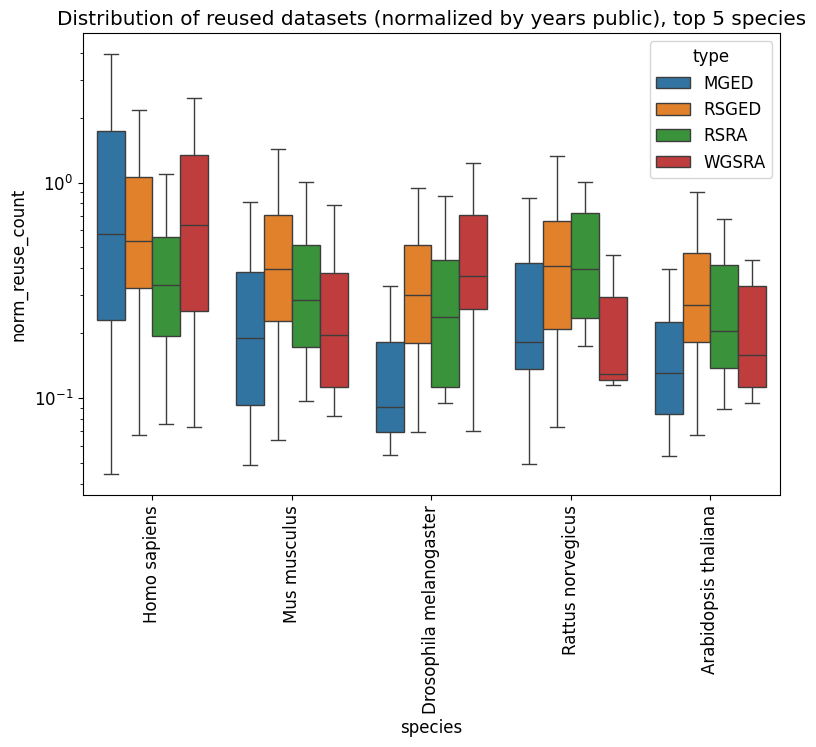

In [ ]:
# plot reuse distribution for top 10 species, NRI

fig, ax = plt.subplots(figsize=fig_dims)
s = sns.boxplot(data = accs_top_spec.loc[accs_top_spec['reuse_count'] > 0, :],
                x = 'species', y = 'norm_reuse_count', hue = 'type', showfliers = False, ax = ax)
s.set(yscale = 'log')
# add_stat_annotation(data = accs_top_spec.loc[accs_top_spec['reuse_count'] > 0, :],
#                    x = 'species', y = 'reuse_count',
#                     box_pairs = [(("Homo sapiens", "GEO"), ("Homo sapiens"), ("SRA"))], test = 't-test_ind', ax = ax)
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
title = "Distribution of reused datasets (normalized by years public), top " + str(NUM_TOPSPECIES) + " species"
ax.set_title(title)
#plt.savefig("speciesDistHUE_NRI.png")
plt.show()

<ipython-input-56-8821779a5fdd>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_xticklabels(s.get_xticklabels(), rotation = 90)


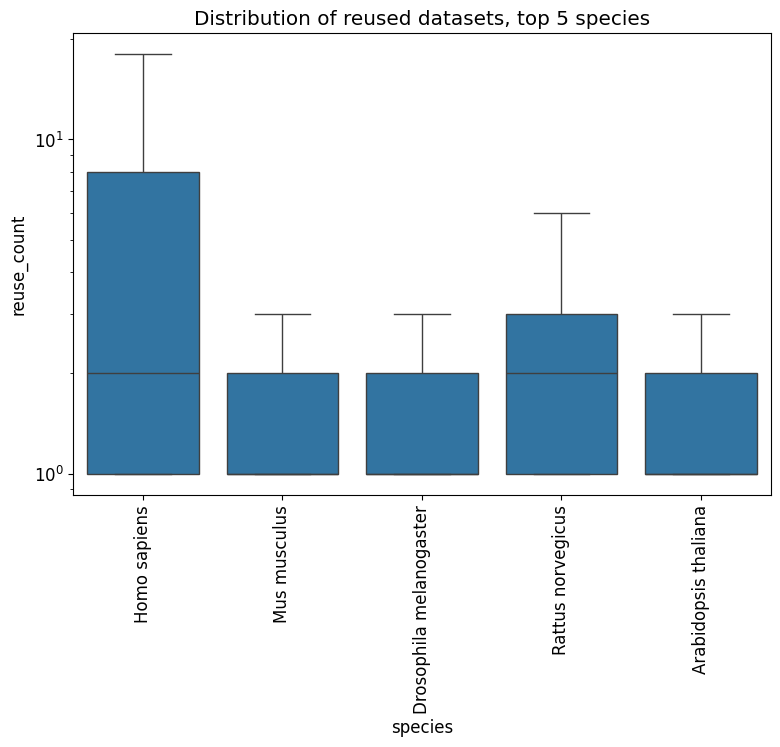

In [ ]:
# plot species plot without the group hue, RI
fig, ax = plt.subplots(figsize=fig_dims)
s = sns.boxplot(data = accs_top_spec.loc[accs_top_spec['reuse_count'] > 0, :],
                x = 'species', y = 'reuse_count', showfliers = False, ax = ax)
s.set(yscale = 'log')
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
title = "Distribution of reused datasets, top " + str(NUM_TOPSPECIES) + " species"
ax.set_title(title)
plt.savefig("speciesDist.png")
plt.show()

<ipython-input-57-c12f2705387a>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_xticklabels(s.get_xticklabels(), rotation = 90)


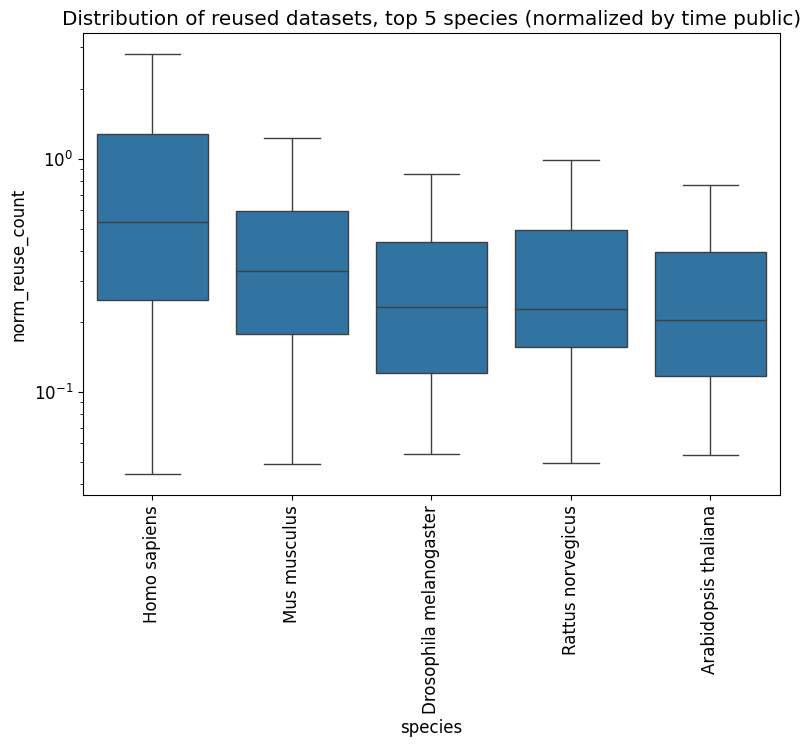

In [ ]:
# plot species plot without the group hue, NRI
fig, ax = plt.subplots(figsize=fig_dims)
s = sns.boxplot(data = accs_top_spec.loc[accs_top_spec['reuse_count'] > 0, :],
                x = 'species', y = 'norm_reuse_count', showfliers = False, ax = ax)
s.set(yscale = 'log')
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
title = "Distribution of reused datasets, top " + str(NUM_TOPSPECIES) + " species (normalized by time public)"
ax.set_title(title)
plt.savefig("speciesDist_NRI.png")
plt.show()

In [ ]:
accs_feat.head()

,repository,reuse_role,library_strategy_x,class,type,year,converted_accession,pmc_date,repository_date,species,...,sraBases,library_type,Series_Type,today,time_public,reuse_count,norm_reuse_count,reuse_role_x,pub_delay,is_human
0,GEO,G,Expression_Array,GEO_expr,MGED,2012.0,GSE36260,2012-12-01,2012-03-06,Drosophila melanogaster,...,NaN,genomic,NaN,2024-06-02,12.249315,0.0,0.0,G,270.0,False
1,GEO,G,Expression_Array,GEO_expr,MGED,2012.0,GSE36262,2012-12-01,2012-03-06,Drosophila melanogaster,...,NaN,genomic,NaN,2024-06-02,12.249315,0.0,0.0,G,270.0,False
2,GEO,G,Expression_Array,GEO_expr,MGED,2012.0,GSE36264,2012-12-01,2012-03-06,Drosophila melanogaster,...,NaN,genomic,NaN,2024-06-02,12.249315,0.0,0.0,G,270.0,False
3,GEO,G,Expression_Array,GEO_expr,MGED,2012.0,GSE36261,2012-12-01,2012-03-06,Drosophila melanogaster,...,NaN,genomic,NaN,2024-06-02,12.249315,0.0,0.0,G,270.0,False
4,GEO,G,Expression_Array,GEO_expr,MGED,2012.0,GSE36265,2012-12-01,2012-03-06,Drosophila melanogaster,...,NaN,RNA,NaN,2024-06-02,12.249315,0.0,0.0,G,270.0,False


In [ ]:
# plot reuse per library strategy in SRA

lc = Counter(accs_feat.loc[accs_feat['repository'] == "SRA", :]['library_strategy_y'])

libCounts = pd.DataFrame.from_dict(lc, orient = 'index').reset_index()
libCounts.columns = ['library_strategy', 'count']
# print(specCounts.head(n = 20))

NUM_TOPLIBS = 10

topLibsSRA = libCounts.dropna().sort_values(by = 'count', ascending = False).head(n = NUM_TOPLIBS)['library_strategy'].to_list()

accs_top_libsSRA = accs_feat.loc[inList(accs_feat['library_strategy_x'], topLibsSRA), :].sort_values(by = 'reuse_count', ascending = False)
accs_top_libsSRA

In [ ]:
mm.head()

,pmc_ID,accession,converted_accession,repository,pmc_date,repository_date,species,hardware,library_strategy,sraAvg_length,...,library_type,Series_Type,today,time_public,reuse_count,norm_reuse_count,reuse_role,reuse_role_x,pub_delay,class
0,PMC3514680,GSE36260,GSE36260,GEO,2012-12-01,2012-03-06,Drosophila melanogaster,in situ oligonucleotide,Expression_Array,NaN,...,genomic,NaN,2024-06-02,12.249315,0,0.0,G,G,270.0,GEO_expr
1,PMC9290052,PRJNA712975,SRP310371,SRA,2021-12-07,2021-03-12,Wolbachia pipientis,Sequel II,WGS,4886.0,...,GENOMIC,NaN,2024-06-02,3.227397,0,0.0,G,G,270.0,SRA_other
2,PMC9984802,ERX9258761,ERP136494,SRA,2023-02-07,2022-05-13,Auanema sp. JU1783,Illumina HiSeq 2000,WGS,202.0,...,GENOMIC,NaN,2024-06-02,2.057534,0,0.0,G,G,270.0,SRA_other
3,PMC8097326,SRP262554,SRP262554,SRA,2021-02-15,2020-05-21,Cucumis sativus,PacBio RS II,RNA-Seq,1962.0,...,TRANSCRIPTOMIC,NaN,2024-06-02,4.035616,0,0.0,G,G,270.0,RNA-Seq
4,PMC8986393,PRJNA743336,SRP326696,SRA,2022-03-30,2021-07-03,Rattus norvegicus,Illumina NovaSeq 6000,RNA-Seq,300.0,...,TRANSCRIPTOMIC,NaN,2024-06-02,2.917808,0,0.0,G,G,270.0,RNA-Seq


<ipython-input-96-4fc967e44549>:22: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='library_strategy', y='norm_reuse_count', data=filtered_sra_data, scale='width')


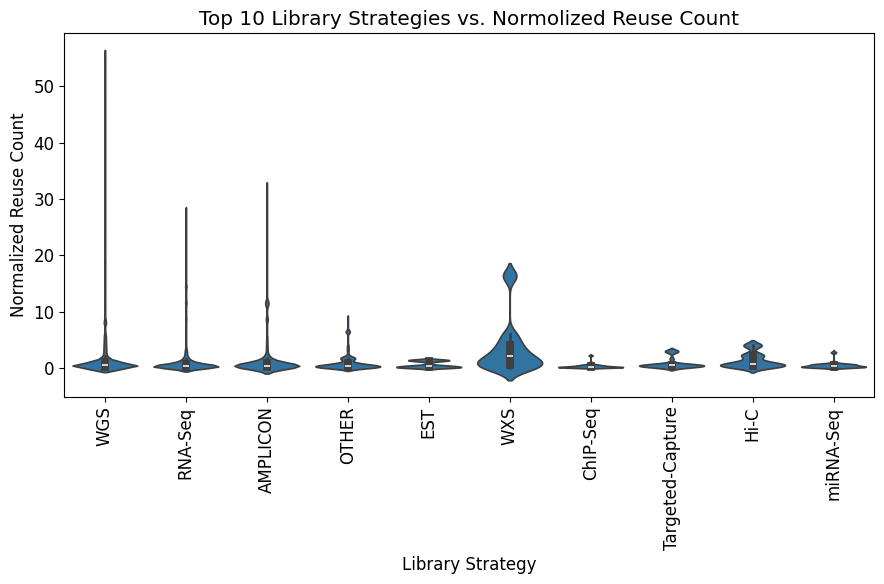

In [ ]:
# plot reuse per library strategy in SRA
data = mm


# Step 3: Filter for SRA Repository
sra_data = data[data['repository'] == 'SRA']
sra_data = sra_data.loc[sra_data['norm_reuse_count'] > 0, :]


# Step 4: Group by `library_strategy` and Calculate Total `reuse_count`
grouped_data = sra_data.groupby('library_strategy')['norm_reuse_count'].sum().reset_index()

# Step 5: Get Top 10 `library_strategy` based on `reuse_count`
top_10_strategies = grouped_data.nlargest(10, 'norm_reuse_count')['library_strategy']

# Step 6: Filter the original SRA data to include only the top 10 `library_strategy`
filtered_sra_data = sra_data[sra_data['library_strategy'].isin(top_10_strategies)]

# Step 7: Generate Box Plot
#plt.figure(figsize=(12, 6))
fig, ax = plt.subplots(figsize=fig_dims)
sns.violinplot(x='library_strategy', y='norm_reuse_count', data=filtered_sra_data, scale='width')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.title('Top 10 Library Strategies vs. Normolized Reuse Count')
plt.xlabel('Library Strategy')
plt.ylabel('Normalized Reuse Count')
plt.tight_layout()
plt.show()


<ipython-input-97-7b013c7d3527>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='library_strategy', y='reuse_count', data=top_10_strategies, palette='viridis')


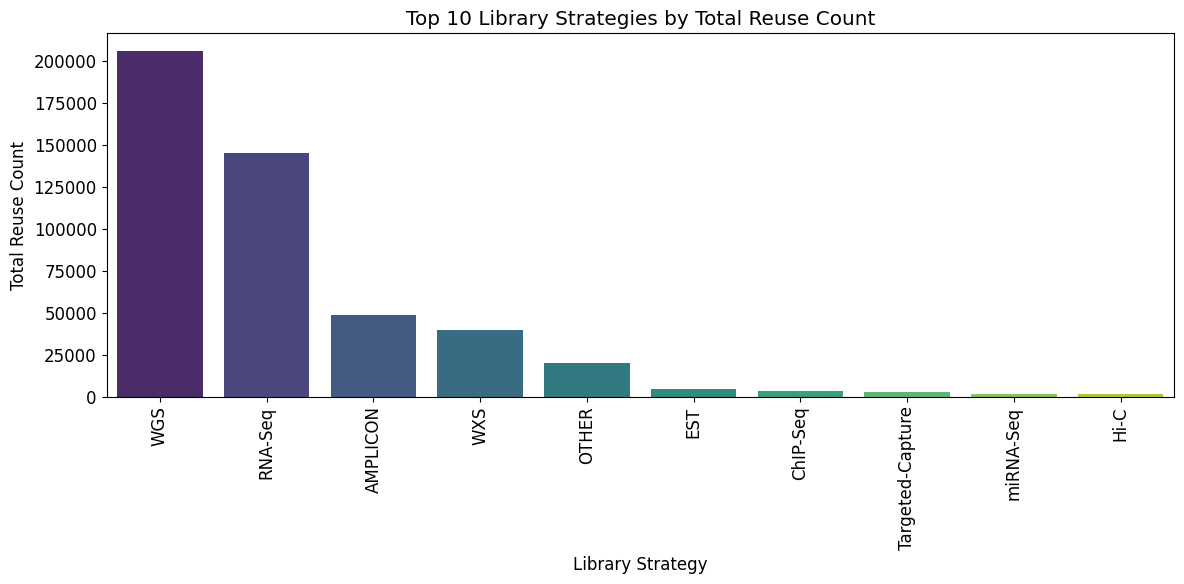

In [ ]:
sra_data = data[data['repository'] == 'SRA']

# Step 4: Calculate total `reuse_count` for each `library_strategy`
total_reuse_counts = sra_data.groupby('library_strategy')['reuse_count'].sum().reset_index()

# Step 5: Sort by `reuse_count` in descending order and select top 10
top_10_strategies = total_reuse_counts.sort_values(by='reuse_count', ascending=False).head(10)

# Step 6: Generate Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='library_strategy', y='reuse_count', data=top_10_strategies, palette='viridis')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.title('Top 10 Library Strategies by Total Reuse Count')
plt.xlabel('Library Strategy')
plt.ylabel('Total Reuse Count')
plt.tight_layout()
plt.show()

In [ ]:
test = accs_top_libsSRA.loc[accs_top_libsSRA['reuse_count'] > 0, :]
#test2 = test.median().sort_values(by='reuse_count')
test

,pmc_ID,accession,converted_accession,repository,pmc_date,repository_date,species,hardware,library_strategy,sraAvg_length,...,library_type,Series_Type,today,time_public,reuse_count,norm_reuse_count,reuse_role,reuse_role_x,pub_delay,class
167953,PMC8742581,GPL11154,GSE16256,GEO,2022-01-04,2009-08-03,Homo sapiens,high-throughput sequencing,RNA-Seq,NaN,...,SRA,NaN,2024-06-02,14.841096,507,34.161898,NaN,R,NaN,RNA-Seq
164968,PMC8664385,GPL16791,GSE16256,GEO,2021-12-06,2009-08-03,Homo sapiens,high-throughput sequencing,RNA-Seq,NaN,...,SRA,NaN,2024-06-02,14.841096,507,34.161898,NaN,R,NaN,RNA-Seq
281266,PMC8535304,GPL10999,GSE16256,GEO,2021-10-03,2009-08-03,Homo sapiens,high-throughput sequencing,RNA-Seq,NaN,...,SRA,NaN,2024-06-02,14.841096,507,34.161898,NaN,R,NaN,RNA-Seq
312038,PMC9345973,GPL16791,GSE16256,GEO,2022-08-02,2009-08-03,Homo sapiens,high-throughput sequencing,RNA-Seq,NaN,...,SRA,NaN,2024-06-02,14.841096,507,34.161898,NaN,R,NaN,RNA-Seq
226610,PMC10398987,GPL11154,GSE16256,GEO,2023-08-03,2009-08-03,Homo sapiens,high-throughput sequencing,RNA-Seq,NaN,...,SRA,NaN,2024-06-02,14.841096,507,34.161898,NaN,R,NaN,RNA-Seq
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254764,PMC7074699,SRR9720875,SRP215671,SRA,2020-02-15,2019-07-21,pollen metagenome,Illumina MiSeq,AMPLICON,602.0,...,METAGENOMIC,NaN,2024-06-02,4.871233,1,0.205287,NaN,R,NaN,SRA_other
250897,PMC10368551,PRJNA573913,SRP223284,SRA,2023-07-25,2019-09-27,sediment metagenome,Illumina MiSeq,AMPLICON,501.0,...,METAGENOMIC,NaN,2024-06-02,4.684932,1,0.213450,NaN,R,NaN,SRA_other
49324,PMC9346365,ERR1364014,ERP013538,SRA,2016-04-20,2016-04-20,Shigella flexneri,Illumina HiSeq 2000,WGS,250.0,...,GENOMIC,NaN,2024-06-02,8.123288,1,0.123103,G,G,0.0,SRA_other
49325,PMC4117942,GSE59610,GSE59610,GEO,2014-08-01,2014-08-01,Drosophila melanogaster,Non-coding RNA profiling by high throughput se...,RNA-Seq,NaN,...,NaN,Non-coding RNA profiling by high throughput se...,2024-06-02,9.843836,1,0.101586,G,G,0.0,RNA-Seq


In [ ]:
print(test['library_strategy'].value_counts())

library_strategy
RNA-Seq             73490
WGS                 22523
AMPLICON             5710
OTHER                2554
WXS                  1404
ChIP-Seq             1026
miRNA-Seq             611
Targeted-Capture      450
WGA                   376
RAD-Seq               224
Name: count, dtype: int64


<ipython-input-84-d12e0753726e>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_xticklabels(s.get_xticklabels(), rotation = 90)


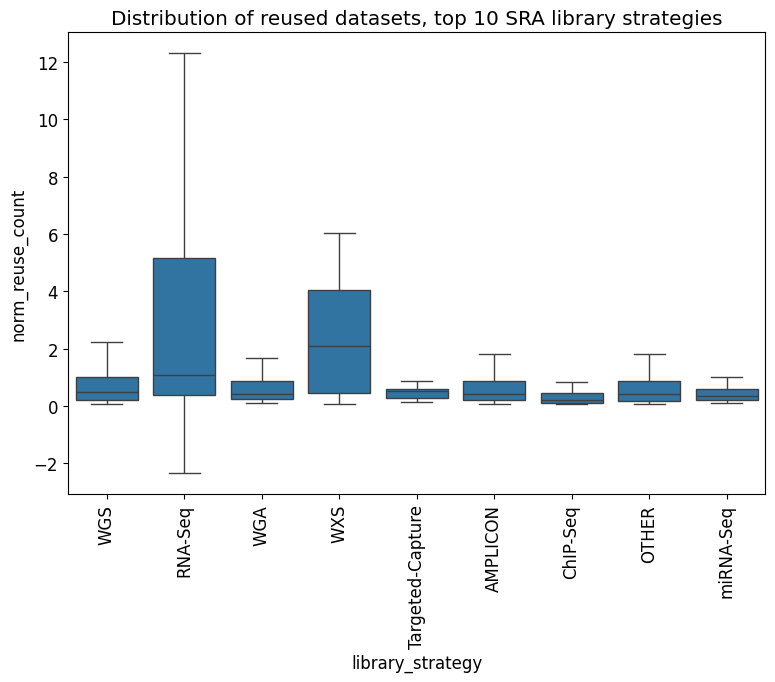

In [ ]:
# plot library strategies, RI
fig, ax = plt.subplots(figsize=fig_dims)
s = sns.boxplot(data = test,
                x = 'library_strategy', y = 'norm_reuse_count',
                order=["WGS" , "RNA-Seq", "WGA", "WXS", "Targeted-Capture" , "AMPLICON", "ChIP-Seq", "OTHER", "miRNA-Seq"],
                showfliers = False, ax = ax)
# s.set(yscale = 'log')
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
title = "Distribution of reused datasets, top " + str(NUM_TOPLIBS) + " SRA library strategies"
ax.set_title(title)
#plt.savefig("libstratDist.png")
plt.show()

In [ ]:
accs_top_libsSRA

,repository,reuse_role,library_strategy_x,class,type,year,converted_accession,pmc_date,repository_date,species,...,sraBases,library_type,Series_Type,today,time_public,reuse_count,norm_reuse_count,reuse_role_x,pub_delay,is_human
1091932,GEO,G,RNA-Seq,RNA-Seq,RSGED,2013.0,GSE16256,2009-08-03,2009-08-03,Homo sapiens,...,NaN,SRA,NaN,2024-06-02,14.841096,507.0,34.161898,G,0.0,True
1014669,GEO,G,RNA-Seq,RNA-Seq,RSGED,2010.0,GSE16256,2009-08-03,2009-08-03,Homo sapiens,...,NaN,SRA,NaN,2024-06-02,14.841096,507.0,34.161898,G,0.0,True
1015289,GEO,G,RNA-Seq,RNA-Seq,RSGED,2011.0,GSE16256,2009-08-03,2009-08-03,Homo sapiens,...,NaN,SRA,NaN,2024-06-02,14.841096,507.0,34.161898,G,0.0,True
864368,GEO,G,RNA-Seq,RNA-Seq,RSGED,2009.0,GSE16256,2009-08-03,2009-08-03,Homo sapiens,...,NaN,SRA,NaN,2024-06-02,14.841096,507.0,34.161898,G,0.0,True
1119732,GEO,G,RNA-Seq,RNA-Seq,RSGED,2018.0,GSE78220,2018-09-19,2018-09-19,Homo sapiens,...,NaN,NaN,Expression profiling by high throughput sequen...,2024-06-02,5.706849,413.0,72.369179,G,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466214,SRA,R,AMPLICON,SRA_other,NaN,2010.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1466266,SRA,R,ChIP-Seq,SRA_other,NaN,2010.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1468529,SRA,R,AMPLICON,SRA_other,NaN,2013.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1471138,SRA,R,WXS,SRA_other,NaN,2010.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


<ipython-input-167-903db47c9d51>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_xticklabels(s.get_xticklabels(), rotation = 90)


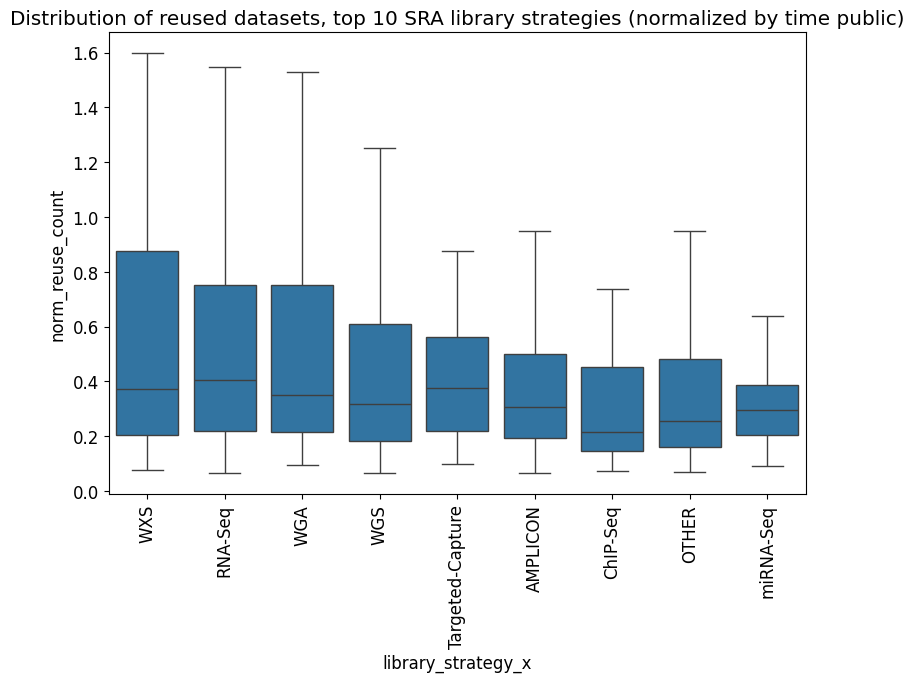

In [ ]:
# plot library strategies, NRI
fig, ax = plt.subplots(figsize=fig_dims)
s = sns.boxplot(data = accs_top_libsSRA.loc[accs_top_libsSRA['reuse_count'] > 0, :],
                order=["WXS" , "RNA-Seq", "WGA", "WGS", "Targeted-Capture" , "AMPLICON", "ChIP-Seq", "OTHER", "miRNA-Seq"],
                x = 'library_strategy_x', y = 'norm_reuse_count', showfliers = False, ax = ax)
# s.set(yscale = 'log')
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
title = "Distribution of reused datasets, top " + str(NUM_TOPLIBS) + " SRA library strategies (normalized by time public)"
ax.set_title(title)
plt.savefig("libstratDist_NRI.png")
plt.show()

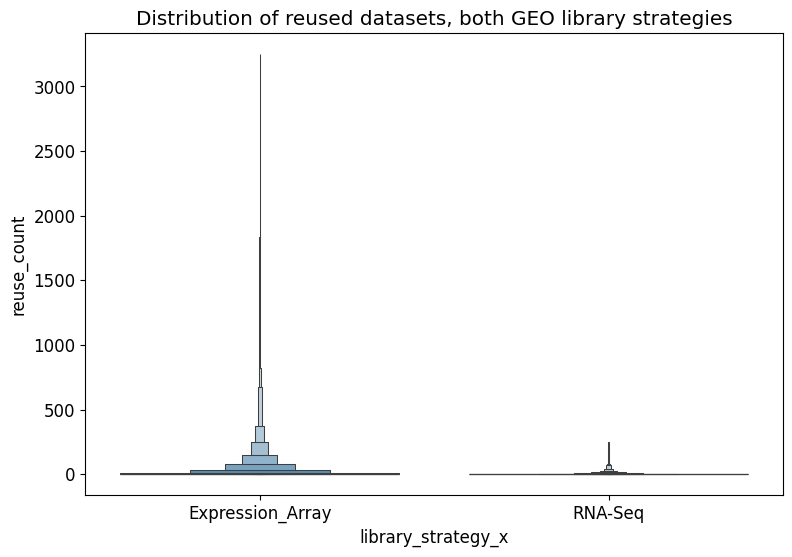

In [ ]:
# plot reuse per library strategy in GEO, RI

accs_top_libsGEO = accs_feat.loc[accs_feat['repository'] == 'GEO', :]

fig, ax = plt.subplots(figsize=fig_dims)
# s = sns.boxplot(data = accs_top_libsGEO.loc[accs_top_libsGEO['reuse_count'] > 0, :],
#                 x = 'library_strategy', y = 'reuse_count', showfliers = False, ax = ax)
s = sns.boxenplot(data = accs_top_libsGEO.loc[accs_top_libsGEO['reuse_count'] > 0, :],
                x = 'library_strategy_x', y = 'reuse_count', ax = ax, showfliers = False)
# s.set(yscale = 'log')
title = "Distribution of reused datasets, both GEO library strategies"
ax.set_title(title)
#plt.savefig("../figures/geoLibstratDist.png")
plt.show()

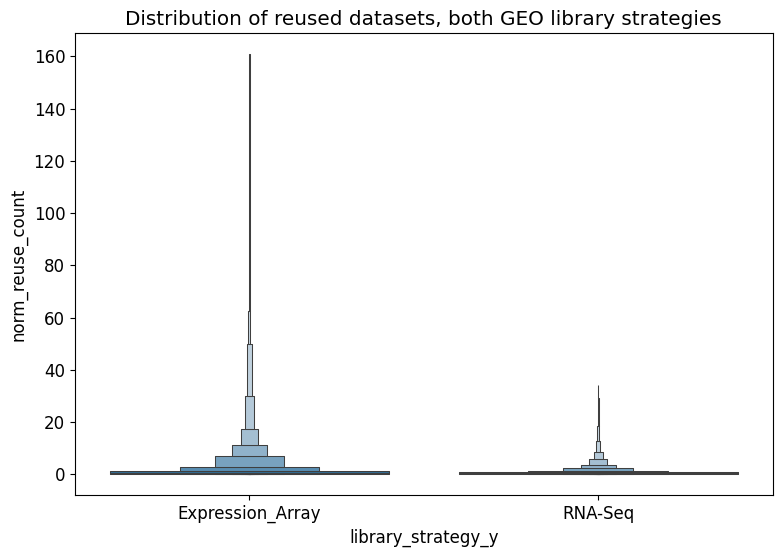

In [ ]:
# plot reuse per library strategy in GEO, NRI

accs_top_libsGEO = accs_feat.loc[accs_feat['repository'] == 'GEO', :]

fig, ax = plt.subplots(figsize=fig_dims)
# s = sns.boxplot(data = accs_top_libsGEO.loc[accs_top_libsGEO['reuse_count'] > 0, :],
#                 x = 'library_strategy', y = 'reuse_count', showfliers = False, ax = ax)
s = sns.boxenplot(data = accs_top_libsGEO.loc[accs_top_libsGEO['reuse_count'] > 0, :],
                x = 'library_strategy_y', y = 'norm_reuse_count', ax = ax, showfliers = False)
# s.set(yscale = 'log')
title = "Distribution of reused datasets, both GEO library strategies"
ax.set_title(title)
#plt.savefig("../figures/geoLibstratDist_NRI.png")
plt.show()

In [ ]:
accs.head()

,pmc_ID,converted_accession,repository,reuse_count,norm_reuse_count,time_public,class,pmc_date,type,wasReused,year
0,PMC3514680,GSE36260,GEO,0,0.0,12.249315,GEO_expr,2012-12-01,MGED,False,2012
1,PMC9290052,SRP310371,SRA,0,0.0,3.227397,SRA_other,2021-12-07,WGSRA,False,2021
2,PMC9984802,ERP136494,SRA,0,0.0,2.057534,SRA_other,2023-02-07,WGSRA,False,2023
3,PMC8097326,SRP262554,SRA,0,0.0,4.035616,RNA-Seq,2021-02-15,RSRA,False,2021
4,PMC8986393,SRP326696,SRA,0,0.0,2.917808,RNA-Seq,2022-03-30,RSRA,False,2022


In [ ]:
accs_age

,pmc_ID,converted_accession,repository,reuse_count,norm_reuse_count,time_public,class,pmc_date,type,wasReused,year
14,PMC8402187,SRP292469,SRA,1,0.281419,3.553425,SRA_other,2021-08-10,WGSRA,True,2021
41,PMC3777969,SRP012150,SRA,1,0.087341,11.449315,SRA_other,2013-09-19,WGSRA,True,2013
43,PMC4005674,GSE37275,GEO,2,0.184065,10.865753,RNA-Seq,2014-04-20,RSGED,True,2014
51,PMC4311262,GSE44019,GEO,2,0.186749,10.709589,GEO_expr,2014-06-16,MGED,True,2014
52,PMC3674655,GSE40275,GEO,38,3.226332,11.778082,GEO_expr,2013-05-22,MGED,True,2013
...,...,...,...,...,...,...,...,...,...,...,...
345439,PMC3895848,GSE8894,GEO,124,7.494618,16.545205,GEO_expr,2014-01-09,MGED,True,2014
345440,PMC3895848,GSE3141,GEO,186,10.010321,18.580822,GEO_expr,2014-01-09,MGED,True,2014
345441,PMC3895848,GSE37745,GEO,349,29.965890,11.646575,GEO_expr,2014-01-09,MGED,True,2014
345442,PMC3960509,ERP000071,SRA,4,0.302591,13.219178,SRA_other,2013-04-05,NaN,True,2013


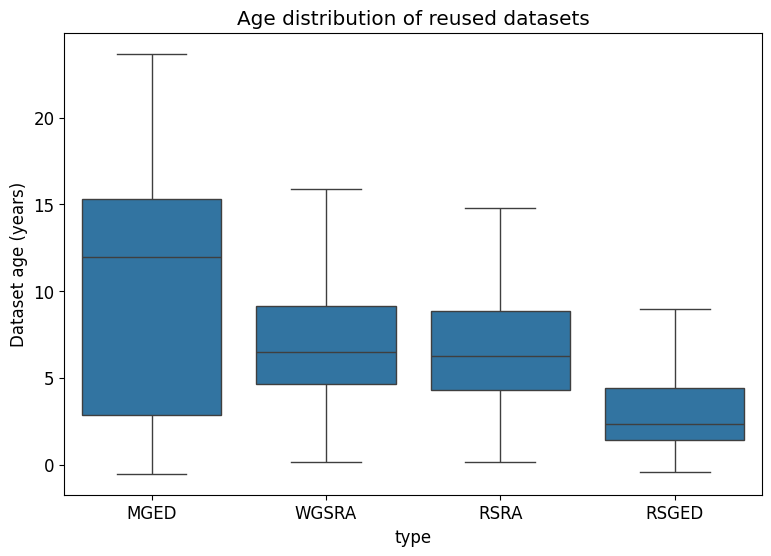

In [ ]:
# plot distribution of age of the datasets which were reused at least once

accs_age = accs.loc[accs["reuse_count"] > 0, :].drop_duplicates()
accs_age

fig, ax = plt.subplots(figsize=fig_dims)
s = sns.boxplot(data = accs_age, x = "type", y = "time_public", ax = ax,
                 order = ["MGED", "WGSRA", "RSRA", "RSGED"], showfliers = False)
s.set(ylabel = "Dataset age (years)")
title = "Age distribution of reused datasets"
ax.set_title(title)
#plt.savefig("../figures/ageDistribution.png")
plt.show()

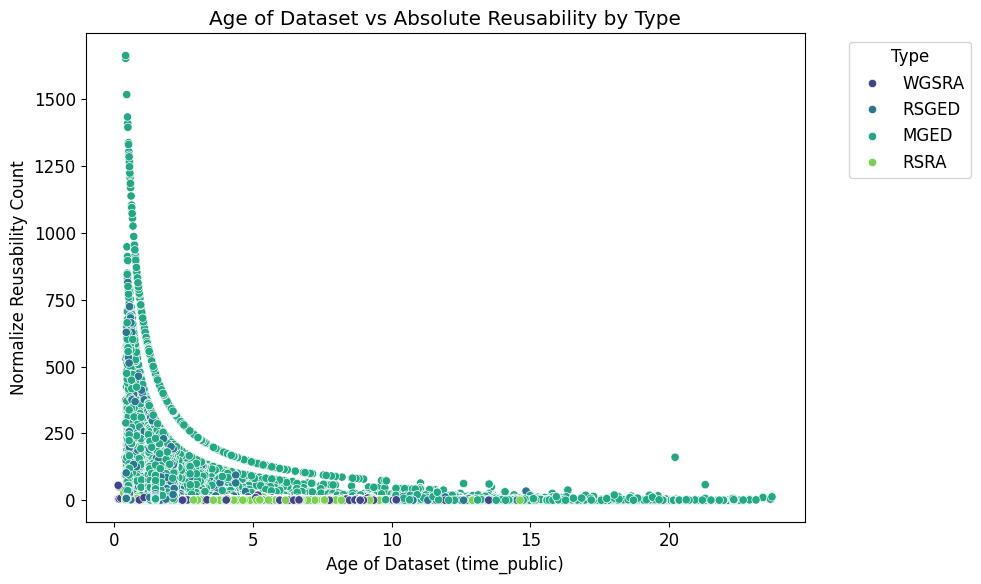

In [ ]:
# Create the scatter plot

accs_age = accs.loc[accs["norm_reuse_count"] > 0, :].drop_duplicates()
accs_age

plt.figure(figsize=(10, 6))
sns.scatterplot(data = accs_age, x='time_public', y='norm_reuse_count', hue='type', palette='viridis')

# Add plot title and labels
plt.title('Age of Dataset vs Absolute Reusability by Type')
plt.xlabel('Age of Dataset (time_public)')
plt.ylabel('Normalize Reusability Count')

# Display the legend
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# determine the top 10 most reused datasets

NUM_MOSTREUSED = 10

accs_feat_filt = accs_feat.loc[accs_feat['reuse_count'] > 0, :]
accs_feat_filtGEO = accs_feat_filt.loc[accs_feat_filt['class'] == 'GEO_expr', :]
accs_feat_filtSRA = accs_feat_filt.loc[accs_feat_filt['class'] == 'SRA_other', :]

most_reused = accs_feat_filt[['converted_accession', 'reuse_count']].drop_duplicates().sort_values(by = 'reuse_count', ascending = False).head(n = NUM_MOSTREUSED)
most_reused

,converted_accession,reuse_count
870468,GSE1145,3249.0
870467,GSE473,1241.0
858291,GSE14520,819.0
859981,GSE31210,788.0
938133,GSE39582,711.0
880787,GSE22427,677.0
885676,GSE9819,620.0
877335,GSE30219,508.0
864368,GSE16256,507.0
934966,GSE17536,452.0


In [ ]:
df_ds = nn
df_ds.loc[:, "pmc_year"] = pd.to_datetime(mm["pmc_date"], format='%Y-%m-%d', errors='coerce').dt.year
df_ds = df_ds[["converted_accession", "pmc_year", "pmc_date", "class"]]
df_ds = df_ds.loc[df_ds["class"] == "GEO_expr", :]
df_ds = df_ds[['converted_accession', 'pmc_year', 'pmc_date']]
df_ds = df_ds.groupby(["pmc_year", "converted_accession"], as_index = False).count()
df_ds.columns = ["pmc_year", "converted_accession", "number_of_reuses"]
topds = most_reused["converted_accession"].to_list()
df_ds = df_ds.loc[inList(df_ds["converted_accession"], topds), :]
df_ds = df_ds.loc[df_ds["pmc_year"] != 2024, :]
df_ds

,pmc_year,converted_accession,number_of_reuses
33,2003.0,GSE473,28
55,2004.0,GSE1145,64
385,2006.0,GSE473,1
582,2007.0,GSE473,5
1228,2008.0,GSE1145,3
...,...,...,...
56446,2023.0,GSE30219,126
56520,2023.0,GSE31210,181
57106,2023.0,GSE39582,173
57594,2023.0,GSE473,261


In [ ]:
# plot the trajectory of the reuse of some of the most reused datasets through time

# set up the dataframe
df_ds = nn
df_ds.loc[:, "pmc_year"] = pd.to_datetime(mm["pmc_date"]).dt.year
df_ds = df_ds[["converted_accession", "pmc_year", "pmc_date"]]
df_ds = df_ds.groupby(["pmc_year", "converted_accession"], as_index = False).count()
df_ds.columns = ["pmc_year", "converted_accession", "number_of_reuses"]
topds = most_reused["converted_accession"].to_list()
df_ds = df_ds.loc[inList(df_ds["converted_accession"], topds), :]
df_ds = df_ds.loc[df_ds["pmc_year"] != 2024, :]

In [ ]:
df_ds.head()

,pmc_year,converted_accession,number_of_reuses
33,2003.0,GSE473,28
55,2004.0,GSE1145,64
385,2006.0,GSE473,1
587,2007.0,GSE473,5
1236,2008.0,GSE1145,3


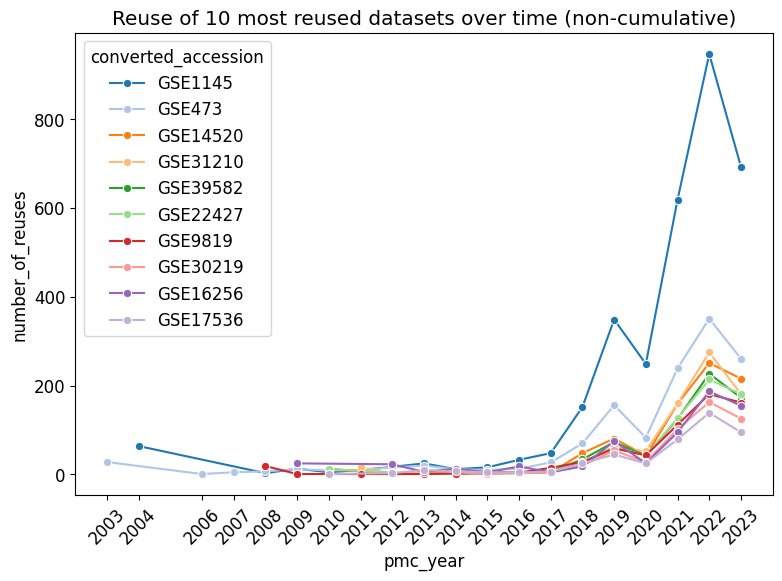

In [ ]:
# plot the data on one set of axes
years = df_ds['pmc_year'].drop_duplicates().to_list()
years = [int(i) for i in years]
fig, ax = plt.subplots(figsize=fig_dims)
s = sns.lineplot(data = df_ds, x = "pmc_year", y = "number_of_reuses", hue = "converted_accession",
                 hue_order = most_reused["converted_accession"].to_list(), marker = 'o', ax = ax)
plt.xticks(ticks = years, rotation = 45)
title = "Reuse of " + str(NUM_MOSTREUSED) + " most reused datasets over time (non-cumulative)"
ax.set_title(title)
#plt.savefig("reuseOverTime_mostReusedDatasets.png")
plt.show()

In [ ]:
# # plot library stragegy overlap between SRA and GEO (RNA-Seq)

# accsRS = accs_feat.loc[accs_feat['library_strategy'] == 'RNA-Seq', :]

# fig, ax = plt.subplots(figsize=fig_dims)
# s = sns.boxenplot(data = accsRS.loc[accsRS['reuse_count'] > 0, :],
#                 x = 'library_strategy', y = 'reuse_count', hue = 'repository', ax = ax)
# # s.set(yscale = 'log')
# title = "Distribution of reused datasets, RNA-Seq"
# ax.set_title(title)
# plt.show()

In [ ]:
# # plot reuse per hardware

# hc = Counter(accs_feat['hardware'])

# hwCounts = pd.DataFrame.from_dict(hc, orient = 'index').reset_index()
# hwCounts.columns = ['hardware', 'count']

# NUM_TOPHWS = 15

# topHws = hwCounts.dropna().sort_values(by = 'count', ascending = False).head(n = NUM_TOPHWS)['hardware'].to_list()

# accs_top_hws = accs_feat.loc[inList(accs_feat['hardware'], topHws), :].sort_values(by = 'reuse_count', ascending = False)

In [ ]:
# fig, ax = plt.subplots(figsize=fig_dims)
# # s = sns.boxenplot(data = accs_top_hws.loc[accs_top_hws['reuse_count'] > 0, :], x = 'hardware', y = 'reuse_count', hue = 'repository', ax = ax)
# s = sns.boxplot(data = accs_top_hws.loc[accs_top_hws['reuse_count'] > 0, :],
#                 x = 'hardware', y = 'reuse_count', hue = 'class', showfliers = False, ax = ax)
# s.set(yscale = 'log')
# s.set_xticklabels(s.get_xticklabels(), rotation = 90)
# title = "Distribution of reused datasets, top " + str(NUM_TOPHWS) + " types of sequencing hardware"
# ax.set_title(title)
# plt.savefig("../figures/hardwareDist.png")
# plt.show()

In [ ]:
# # plot reuse by impact factor

# # import data
# if_table = pd.read_csv("../data_tables/impactFactor_table.csv")
# if_table = if_table.drop(['journal', 'pmc_ID'], axis = 1).drop_duplicates().dropna()
# avgIFs = if_table.groupby('converted_accession', as_index = False).agg({'ImpactFactor':'max'})
# if_table = pd.merge(avgIFs, if_table, on = 'converted_accession', how = 'left')
# if_table = if_table.rename(columns = {'ImpactFactor_x':'MAX_ImpactFactor', 'ImpactFactor_y':'ImpactFactor'})
# # if_table

In [ ]:
# if_table = if_table.drop(['ImpactFactor'], axis = 1).drop_duplicates()
# # if_table

In [ ]:
# fig, ax = plt.subplots(figsize=(12, 9))
# s = sns.scatterplot(data = if_table.loc[if_table['reuse_count'] > 0, :], x = 'MAX_ImpactFactor', y = 'reuse_count', hue = 'repository', ax = ax)
# s.set(yscale = 'log')
# title = "Reuse count per maximum journal impact factor"
# ax.set_title(title)
# plt.show()

In [ ]:
# # plot reuse by access restrictions

# # Counter(accs_feat.loc[accs_feat['repository'] == 'SRA', :]['sraAccess'])

# fig, ax = plt.subplots(figsize=fig_dims)
# # sns.boxenplot(data = accs_feat.loc[accs_feat['repository'] == 'SRA', :].loc[accs_feat['reuse_count'] > 0], x = 'sraAccess', y = 'reuse_count', ax = ax)
# sns.boxplot(data = accs_feat.loc[accs_feat['repository'] == 'SRA', :].loc[accs_feat['reuse_count'] > 0], x = 'sraAccess', y = 'reuse_count', ax = ax)
# s.set(yscale = 'log')
# s.set_xticklabels(s.get_xticklabels(), rotation = 90)
# title = "Distribution of reused datasets in SRA by access restrictions"
# ax.set_title(title)
# plt.show()

In [ ]:
# # plot reuse versus sample size

# fig, ax = plt.subplots(figsize=fig_dims)
# s = sns.scatterplot(data = accs_feat, x = 'sraBases', y = 'reuse_count')
# title = "Reuse per number of bases (SRA studies)"
# ax.set_title(title)
# plt.show()